In [1]:
#pip install jyquickhelper
from jyquickhelper import add_notebook_menu  
add_notebook_menu()

In [2]:
import sys
print(sys.executable)

C:\Users\belaziw\Anaconda3\envs\new_env\python.exe


## <div class="alert alert-info"><font color='dimgray'> I. Import des Librairies d'Analyse</font> </div>

<div class="alert alert-success">
    
Importons dans un premier temps l'ensemble des librairies qui vont nous servir durant l'entièreté de ce Projet.</div>

<div class="alert alert-success">
    
**Traitement et Analyse de Données**</div>

In [3]:
import pandas as pd  # Manipulation et analyse de données
import numpy as np  # Calcul scientifique
import scipy.stats as st  # Calculs statistiques
import missingno as msno  # Visualisation des données manquantes
from os import listdir  # Pour lister les fichiers d'un dossier

# Configurations globales pour pandas
pd.set_option('display.max_rows', 9999)
pd.set_option('display.max_columns', 9999)
pd.set_option('display.max_colwidth', None)

<div class="alert alert-success">
    
**Visualisation de Données**</div>

In [4]:
import matplotlib.pyplot as plt  # Visualisation graphique
import seaborn as sns  # Visualisation statistique basée sur matplotlib
import plotly.graph_objs as go  # Plotly pour la création de graphiques interactifs

<div class="alert alert-success">
    
**Configuration**</div>

In [5]:
#Système management
import os  # Interaction avec le système d'exploitation

## <div class="alert alert-info"><font color='dimgray'>II. Fonctions  </font> </div>

In [6]:
def stats_datasets(chemin_dossier):
    stats = []

    for fichier in os.listdir(chemin_dossier):
        if fichier.endswith('.csv'):  # Assurez-vous que le fichier est un CSV
            chemin_fichier = os.path.join(chemin_dossier, fichier)
            print(chemin_fichier)
            df = pd.read_csv(chemin_fichier, encoding = 'utf8')
            print(df.shape)
            nb_lignes = df.shape[0]
            nb_colonnes = df.shape[1]
            pourcentage_remplissage = (df.count().sum() / (nb_lignes * nb_colonnes)) * 100

            stats.append({
                'Nom du Dataset': fichier,
                'Nombre de Lignes': nb_lignes,
                'Nombre de Colonnes': nb_colonnes,
                'Pourcentage de Remplissage Total': pourcentage_remplissage
            })

    return pd.DataFrame(stats)

In [7]:
def test_remplissage(data):

    var_dict = {}
    
    for col in data.columns:
        var_dict[col] = []
        var_dict[col].append(round((data[col].notna().sum()/data.shape[0])*100,2))
        var_dict[col].append(data[col].isna().sum())
        
    return pd.DataFrame.from_dict(data=var_dict, orient="index", columns = ["Taux de remplissage", "Nombre de valeurs manquantes"]).sort_values(by="Taux de remplissage", ascending=False)

In [8]:
def afficher_infos_dataset(dataset):
    """
    Affiche les informations sur un dataset donné.

    Args:
        dataset (pandas.DataFrame): Le DataFrame du dataset.

    Returns:
        None
    """
    # Nombre de lignes et de colonnes
    nb_lignes, nb_variables = dataset.shape
    
    # Pourcentage de valeurs manquantes dans le jeu de données
    pourcentage_manquantes_total = (dataset.isnull().sum().sum() / (nb_lignes * nb_variables)) * 100

    # Nombre de variables avec des valeurs manquantes
    nb_variables_manquantes = dataset.isnull().any().sum()

    print(f"Nombre de lignes dans le dataset : {nb_lignes}")
    print(f"Nombre de variables dans le dataset : {nb_variables}")
    print(f"Pourcentage de valeurs manquantes dans le jeu de données : {pourcentage_manquantes_total:.2f}%")
    print(f"Nombre de variables contenant des valeurs manquantes : {nb_variables_manquantes}")

In [9]:
def plot_taux_remplissage(dataframe):
    """
    Trace un histogramme horizontal du taux de remplissage pour chaque variable dans le dataframe donné.
    Affiche également une ligne verticale représentant un taux de remplissage de 75%.
    
    :param dataframe: Le DataFrame Pandas pour lequel tracer le taux de remplissage.
    """
    # Calculer le taux de remplissage pour chaque colonne en pourcentage
    fill_rates = dataframe.notnull().mean() * 100
    
    # Trier les taux de remplissage pour un affichage cohérent
    fill_rates_sorted = fill_rates.sort_values()
    
    # Ajuster la taille du graphique pour améliorer la lisibilité, en fonction du nombre de variables
    plt.figure(figsize=(10, max(30, len(fill_rates_sorted) * 0.25)))
    
    # Tracer l'histogramme horizontal
    fill_rates_sorted.plot(kind='barh', color='skyblue', edgecolor='none', width=0.8)
    
    # Tracer la ligne de taux de remplissage de 75%
    plt.axvline(x=75, color='red', linestyle='--', label='75% Fill Rate')
    
    plt.xlabel('Taux de remplissage (%)')
    plt.ylabel('Variables')
    plt.title('Taux de remplissage des variables')
    plt.legend()
    
    # Ajuster l'espacement entre les étiquettes pour éviter le chevauchement
    plt.tight_layout()
    
    plt.show()

In [10]:
def reduire_taille_df(df):
    # Calcule et affiche la mémoire utilisée par le DataFrame en mégaoctets avant l'optimisation
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    # Parcourt toutes les colonnes du DataFrame
    for col in df.columns:
        col_type = df[col].dtype  # Type de données de la colonne
        
        # Si la colonne n'est pas de type 'object' (généralement des chaînes de caractères)
        if col_type != object:
            c_min = df[col].min()  # Valeur minimale dans la colonne
            c_max = df[col].max()  # Valeur maximale dans la colonne
            
            # Si la colonne est de type entier
            if str(col_type)[:3] == 'int':
                # Réduire le type de l'entier si possible
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            
            # Si la colonne est de type flottant
            else:
                # Réduire le type du flottant si possible
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        
        # Convertir les colonnes de type 'object' en type 'category' pour économiser de la mémoire
        else:
            df[col] = df[col].astype('category')

    # Calcule et affiche la mémoire utilisée par le DataFrame après l'optimisation
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    # Retourne le DataFrame optimisé
    return df

In [11]:
# Définition de la fonction qui calcule le taux de remplissage par client dans le DataFrame
def taux_remplissage_par_client(dataframe):
    # Calcul du taux de remplissage pour chaque ligne en divisant le nombre de valeurs non nulles par le nombre total de colonnes
    taux_remplissage = ((dataframe.shape[1] - dataframe.isnull().sum(axis=1)) / dataframe.shape[1])
    
    # Tri des taux de remplissage par ordre croissant
    taux_remplissage_tries = taux_remplissage.sort_values()
    
    # Réinitialisation de l'index pour avoir une colonne numérotée
    taux_remplissage_tries = taux_remplissage_tries.reset_index()
    
    # Renommage des colonnes du DataFrame résultant
    taux_remplissage_tries.columns = ['Index', 'Taux de remplissage']
    
    # Renvoi du DataFrame résultant
    return taux_remplissage_tries


In [12]:
def pourcentage_valeurs_aberrantes_variables_manquante(data):
    """
    Calcule le pourcentage de valeurs aberrantes pour chaque colonne numérique du DataFrame
    qui contient des valeurs manquantes.

    :param data: pandas DataFrame.
    :return: DataFrame avec le nom de la colonne et le pourcentage de valeurs aberrantes, trié de manière décroissante.
    """
    resultats = []

    # Itération sur chaque colonne numérique
    for col in data.select_dtypes(include=['number']).columns:
        # Vérification si la colonne contient des valeurs manquantes
        if data[col].isnull().any():
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1

            # Calcul des bornes pour détecter les valeurs aberrantes
            borne_inf = Q1 - 1.5 * IQR
            borne_sup = Q3 + 1.5 * IQR

            # Calcul du pourcentage de valeurs aberrantes
            total = data[col].count()
            nbr_aberrantes = data[(data[col] < borne_inf) | (data[col] > borne_sup)][col].count()
            pourcentage = (nbr_aberrantes / total) * 100

            resultats.append({'Nom_Colonne': col, 'Pourcentage Aberrantes': pourcentage})

    # Création d'un DataFrame pour les résultats
    pourcentage_aberrantes = pd.DataFrame(resultats)

    # Tri des résultats de manière décroissante
    pourcentage_aberrantes = pourcentage_aberrantes.sort_values(by='Pourcentage Aberrantes', ascending=False)

    return pourcentage_aberrantes


## <div class="alert alert-info"><font color='dimgray'>III. Lecture des données  </font> </div>

In [13]:
df = pd.read_csv('df_merged.csv')

In [14]:
df.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002     1.0                   0             0                0   
1      100003     0.0                   0             0                1   
2      100004     0.0                   1             1                0   
3      100006     0.0                   0             0                0   
4      100007     0.0                   0             0                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461         -637.0            -3648.0   
1                    0.003541      -16765        -1188.0            -1186.0   
2                    0.010032      -19046         -225.0            -4260.0   
3                    0.008019      -19005        -3039.0            -9833.0   
4                    0.028663      -19932        -3038.0            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
0                       0                        0      0.083037   
1                       0                        0      0.311267   
2                       0                        0           NaN   
3                       0                        0           NaN   
4                       1                        1           NaN   

   EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.262949      0.139376          0.0247      

In [15]:
df.shape

(356251, 796)

In [16]:
afficher_infos_dataset(df)

Nombre de lignes dans le dataset : 356251
Nombre de variables dans le dataset : 796
Pourcentage de valeurs manquantes dans le jeu de données : 25.43%
Nombre de variables contenant des valeurs manquantes : 617


### <div class="alert alert-info"><font color='dimgray'>IV Nettoyage </font> </div>

### <div class="alert alert-info"><font color='dimgray'>IV.1 Taille et types des colonnes </font> </div>

In [17]:
# Afficher le nombre de lignes et de colonnes
nb_lignes, nb_colonnes = df.shape
print(f"Le jeu de données contient {nb_lignes} lignes et {nb_colonnes} colonnes.")

Le jeu de données contient 356251 lignes et 796 colonnes.


In [18]:
# Afficher les types de chaque colonne du DataFrame df_merged
print(df.dtypes)

SK_ID_CURR                                                                 int64
TARGET                                                                   float64
NAME_CONTRACT_TYPE                                                         int64
FLAG_OWN_CAR                                                               int64
FLAG_OWN_REALTY                                                            int64
CNT_CHILDREN                                                               int64
AMT_INCOME_TOTAL                                                         float64
AMT_CREDIT                                                               float64
AMT_ANNUITY                                                              float64
AMT_GOODS_PRICE                                                          float64
REGION_POPULATION_RELATIVE                                               float64
DAYS_BIRTH                                                                 int64
DAYS_EMPLOYED               

In [19]:
#compter le type de variables
df_type=df.dtypes.value_counts(normalize=True)
df_type

float64    0.781407
int64      0.218593
Name: proportion, dtype: float64

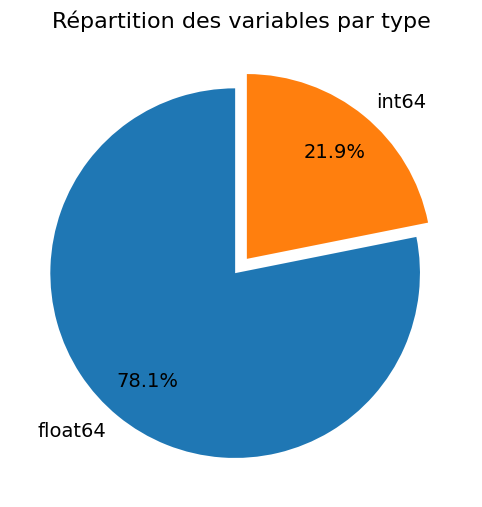

In [20]:
# tracer un graphique de type "pie" 
pie, ax = plt.subplots(figsize=(10,6))
labels=df_type.index
explode = (0.05, 0.05)
plt.pie(x=df_type, autopct="%.1f%%",startangle=90,  pctdistance=0.75,explode=explode, textprops={'fontsize': 14},labels=labels)
plt.title('Répartition des variables par type', fontsize=16)
plt.show()

In [21]:
test_remplissage(df)

Taux de remplissage  \
SK_ID_CURR                                                                          100.00   
ORGANIZATION_TYPE_Housing                                                           100.00   
OCCUPATION_TYPE_Managers                                                            100.00   
OCCUPATION_TYPE_Medicine staff                                                      100.00   
OCCUPATION_TYPE_Private service staff                                               100.00   
OCCUPATION_TYPE_Realty agents                                                       100.00   
OCCUPATION_TYPE_Sales staff                                                         100.00   
OCCUPATION_TYPE_Secretaries                                                         100.00   
OCCUPATION_TYPE_Security staff                                                      100.00   
OCCUPATION_TYPE_Waiters/barmen staff                                                100.00   
WEEKDAY_APPR_PROCESS_START_FRIDAY                                                   100.00   
WEEKDAY_APPR_PROCESS_START_MONDAY                                                   100.00   
WEEKDAY_APPR_PROCESS_START_SATURDAY                                                 100.00   
WEEKDAY_APPR_PROCESS_START_SUNDAY                                                   100.00   
WEEKDAY_APPR_PROCESS_START_THURSDAY                                                 100.00   
WEEKDAY_APPR_PROCESS_START_TUESDAY                                                  100.00   
WEEKDAY_APPR_PROCESS_START_WEDNESDAY                                                100.00   
ORGANIZATION_TYPE_Advertising                                                       100.00   
ORGANIZATION_TYPE_Agriculture                                                       100.00   
ORGANIZATION_TYPE_Bank                                                              100.00   
ORGANIZATION_TYPE_Business Entity Type 1                                            100.00   
ORGANIZATION_TYPE_Business Entity Type 2                                            100.00   
ORGANIZATION_TYPE_Business Entity Type 3                                            100.00   
ORGANIZATION_TYPE_Cleaning                                                          100.00   
ORGANIZATION_TYPE_Construction                                                      100.00   
ORGANIZATION_TYPE_Culture                                                           100.00   
ORGANIZATION_TYPE_Electricity                                                       100.00   
ORGANIZATION_TYPE_Emergency                                                         100.00   
ORGANIZATION_TYPE_Government                                                        100.00   
OCCUPATION_TYPE_Low-skill Laborers                                                  100.00   
OCCUPATION_TYPE_Laborers                                                            100.00   
OCCUPATION_TYPE_IT staff                                                            100.00   
NAME_FAMILY_STATUS_Unknown                                                          100.00   
NAME_INCOME_TYPE_Student                                                            100.00   
NAME_INCOME_TYPE_Unemployed                                                         100.00   
NAME_INCOME_TYPE_Working                                                            100.00   
NAME_EDUCATION_TYPE_Academic degree                                                 100.00   
NAME_EDUCATION_TYPE_Higher education                                                100.00   
NAME_EDUCATION_TYPE_Incomplete higher                                               100.00   
NAME_EDUCATION_TYPE_Lower secondary                                                 100.00   
NAME_EDUCATION_TYPE_Secondary / secondary special                                   100.00   
NAME_FAMILY_STATUS_Civil marriage                                                   100.00   
NAME_FAMILY_STATUS_Married   

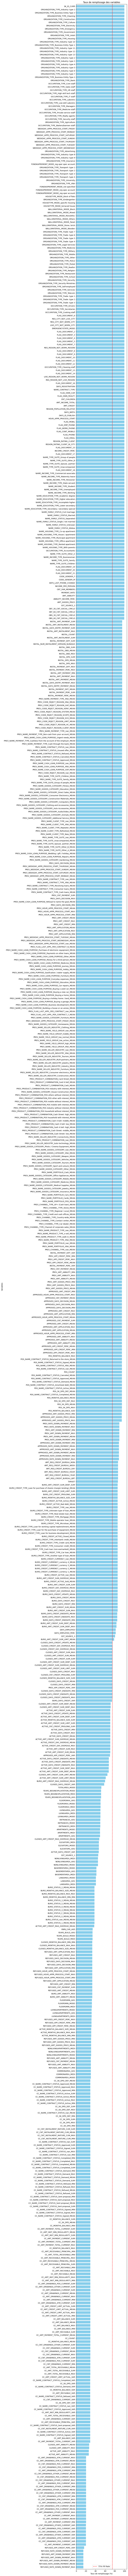

In [22]:
plot_taux_remplissage(df)

### <div class="alert alert-info"><font color='dimgray'>IV.2 Réduction de la taille de jeu de données </font> </div>

<div class="alert alert-success">
 
Réduire la taille d'un jeu de données est essentiel, en particulier lorsqu'on travaille avec de grands ensembles de données, car cela permet de diminuer la consommation de mémoire de l'ordinateur, d'accélérer les temps de traitement et d'analyse, et de rendre le travail avec les données plus efficace et gérable, surtout dans les environnements où les ressources matérielles sont limitées.
</div>

In [23]:
df = reduire_taille_df(df)

Memory usage of dataframe is 2163.51 MB
Memory usage after optimization is: 602.37 MB
Decreased by 72.2%


<div class="alert alert-success">
 
Les résultats indiquent une réduction significative de l'utilisation de la mémoire par le DataFrame après optimisation, passant de **2163,51 Mo** à **603,05 Mo**. Cela représente une diminution de **72,0%** de l'utilisation de la mémoire.
</div>

In [25]:
#df.to_csv('df_optimise.csv', index=False)

In [26]:
df.shape

(356251, 796)

In [27]:
df.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002     1.0                   0             0                0   
1      100003     0.0                   0             0                1   
2      100004     0.0                   1             1                0   
3      100006     0.0                   0             0                0   
4      100007     0.0                   0             0                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018799       -9461         -637.0            -3648.0   
1                    0.003542      -16765        -1188.0            -1186.0   
2                    0.010033      -19046         -225.0            -4260.0   
3                    0.008018      -19005        -3040.0            -9832.0   
4                    0.028656      -19932        -3038.0            -4312.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
0                       0                        0      0.083008   
1                       0                        0      0.311279   
2                       0                        0           NaN   
3                       0                        0           NaN   
4                       1                        1           NaN   

   EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.262939      0.139404        0.024704      

### <div class="alert alert-info"><font color='dimgray'>IV.3  Valeurs infinies </font> </div>

In [28]:
# Identification des valeurs infinies
mask = np.isinf(df)

In [29]:
# Compter le nombre de valeurs infinies
nombre_infinies = mask.sum().sum()
print("\nNombre total de valeurs infinies dans le DataFrame :", nombre_infinies)


Nombre total de valeurs infinies dans le DataFrame : 21


In [30]:
# Affichage des positions et des valeurs des cellules infinies
#print("Valeurs infinies dans le DataFrame :")
#for col in df.columns:
  #  for row in df.index:
     #   if mask.at[row, col]:
      #      print(f"Position: ({row}, {col}), Valeur: {df.at[row, col]}")

In [31]:
valeur_cellule = df.at[201082, 'PREV_APP_CREDIT_PERC_MAX']
print("Contenu de la cellule :", valeur_cellule)

Contenu de la cellule : inf


In [32]:
# remplacer les valeurs infinies 
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [33]:
# Vérification
valeur_cellule = df.at[201082, 'PREV_APP_CREDIT_PERC_MAX']
print("Contenu de la cellule :", valeur_cellule)

Contenu de la cellule : nan


### <div class="alert alert-info"><font color='dimgray'>IV.4  Séparation de jeux des données test et train : Evité la fuite de données </font> </div>

In [34]:
train = df.loc[df['TARGET'].notna()]
test = df.loc[df['TARGET'].isna()]

print(f"Dimensions de train :{train.shape}")
print(f"Dimensions de test :{test.shape}")

Dimensions de train :(307507, 796)
Dimensions de test :(48744, 796)


In [35]:
afficher_infos_dataset(train)

Nombre de lignes dans le dataset : 307507
Nombre de variables dans le dataset : 796
Pourcentage de valeurs manquantes dans le jeu de données : 25.96%
Nombre de variables contenant des valeurs manquantes : 616


In [36]:
afficher_infos_dataset(test)

Nombre de lignes dans le dataset : 48744
Nombre de variables dans le dataset : 796
Pourcentage de valeurs manquantes dans le jeu de données : 22.05%
Nombre de variables contenant des valeurs manquantes : 613


### <div class="alert alert-info"><font color='dimgray'>IV.4.1  Taux de remplissage par ligne (par client) pour le train </font> </div>

In [37]:
test_remplissage(train)

Taux de remplissage  \
SK_ID_CURR                                                                          100.00   
OCCUPATION_TYPE_Managers                                                            100.00   
OCCUPATION_TYPE_Private service staff                                               100.00   
OCCUPATION_TYPE_Realty agents                                                       100.00   
OCCUPATION_TYPE_Sales staff                                                         100.00   
OCCUPATION_TYPE_Secretaries                                                         100.00   
OCCUPATION_TYPE_Security staff                                                      100.00   
OCCUPATION_TYPE_Waiters/barmen staff                                                100.00   
WEEKDAY_APPR_PROCESS_START_FRIDAY                                                   100.00   
WEEKDAY_APPR_PROCESS_START_MONDAY                                                   100.00   
WEEKDAY_APPR_PROCESS_START_SATURDAY                                                 100.00   
WEEKDAY_APPR_PROCESS_START_SUNDAY                                                   100.00   
WEEKDAY_APPR_PROCESS_START_THURSDAY                                                 100.00   
WEEKDAY_APPR_PROCESS_START_TUESDAY                                                  100.00   
WEEKDAY_APPR_PROCESS_START_WEDNESDAY                                                100.00   
ORGANIZATION_TYPE_Advertising                                                       100.00   
ORGANIZATION_TYPE_Agriculture                                                       100.00   
ORGANIZATION_TYPE_Bank                                                              100.00   
ORGANIZATION_TYPE_Business Entity Type 1                                            100.00   
ORGANIZATION_TYPE_Business Entity Type 2                                            100.00   
ORGANIZATION_TYPE_Business Entity Type 3                                            100.00   
ORGANIZATION_TYPE_Cleaning                                                          100.00   
ORGANIZATION_TYPE_Construction                                                      100.00   
ORGANIZATION_TYPE_Culture                                                           100.00   
ORGANIZATION_TYPE_Electricity                                                       100.00   
ORGANIZATION_TYPE_Emergency                                                         100.00   
ORGANIZATION_TYPE_Government                                                        100.00   
ORGANIZATION_TYPE_Hotel                                                             100.00   
ORGANIZATION_TYPE_Housing                                                           100.00   
OCCUPATION_TYPE_Medicine staff                                                      100.00   
OCCUPATION_TYPE_Low-skill Laborers                                                  100.00   
ORGANIZATION_TYPE_Industry: type 10                                                 100.00   
OCCUPATION_TYPE_Laborers                                                            100.00   
NAME_INCOME_TYPE_Unemployed                                                         100.00   
NAME_INCOME_TYPE_Working                                                            100.00   
NAME_EDUCATION_TYPE_Academic degree                                                 100.00   
NAME_EDUCATION_TYPE_Higher education                                                100.00   
NAME_EDUCATION_TYPE_Incomplete higher                                               100.00   
NAME_EDUCATION_TYPE_Lower secondary                                                 100.00   
NAME_EDUCATION_TYPE_Secondary / secondary special                                   100.00   
NAME_FAMILY_STATUS_Civil marriage                                                   100.00   
NAME_FAMILY_STATUS_Married                                                          100.00   
NAME_FAMILY_STATUS_Separated 

In [38]:
test_remplissage(test)

Taux de remplissage  \
SK_ID_CURR                                                                          100.00   
ORGANIZATION_TYPE_Housing                                                           100.00   
OCCUPATION_TYPE_Managers                                                            100.00   
OCCUPATION_TYPE_Medicine staff                                                      100.00   
OCCUPATION_TYPE_Private service staff                                               100.00   
OCCUPATION_TYPE_Realty agents                                                       100.00   
OCCUPATION_TYPE_Sales staff                                                         100.00   
OCCUPATION_TYPE_Secretaries                                                         100.00   
OCCUPATION_TYPE_Security staff                                                      100.00   
OCCUPATION_TYPE_Waiters/barmen staff                                                100.00   
WEEKDAY_APPR_PROCESS_START_FRIDAY                                                   100.00   
WEEKDAY_APPR_PROCESS_START_MONDAY                                                   100.00   
WEEKDAY_APPR_PROCESS_START_SATURDAY                                                 100.00   
WEEKDAY_APPR_PROCESS_START_SUNDAY                                                   100.00   
WEEKDAY_APPR_PROCESS_START_THURSDAY                                                 100.00   
WEEKDAY_APPR_PROCESS_START_TUESDAY                                                  100.00   
WEEKDAY_APPR_PROCESS_START_WEDNESDAY                                                100.00   
ORGANIZATION_TYPE_Advertising                                                       100.00   
ORGANIZATION_TYPE_Agriculture                                                       100.00   
ORGANIZATION_TYPE_Bank                                                              100.00   
ORGANIZATION_TYPE_Business Entity Type 1                                            100.00   
ORGANIZATION_TYPE_Business Entity Type 2                                            100.00   
ORGANIZATION_TYPE_Business Entity Type 3                                            100.00   
ORGANIZATION_TYPE_Cleaning                                                          100.00   
ORGANIZATION_TYPE_Construction                                                      100.00   
ORGANIZATION_TYPE_Culture                                                           100.00   
ORGANIZATION_TYPE_Electricity                                                       100.00   
ORGANIZATION_TYPE_Emergency                                                         100.00   
ORGANIZATION_TYPE_Government                                                        100.00   
OCCUPATION_TYPE_Low-skill Laborers                                                  100.00   
OCCUPATION_TYPE_Laborers                                                            100.00   
OCCUPATION_TYPE_IT staff                                                            100.00   
NAME_FAMILY_STATUS_Unknown                                                          100.00   
NAME_INCOME_TYPE_Student                                                            100.00   
NAME_INCOME_TYPE_Unemployed                                                         100.00   
NAME_INCOME_TYPE_Working                                                            100.00   
NAME_EDUCATION_TYPE_Academic degree                                                 100.00   
NAME_EDUCATION_TYPE_Higher education                                                100.00   
NAME_EDUCATION_TYPE_Incomplete higher                                               100.00   
NAME_EDUCATION_TYPE_Lower secondary                                                 100.00   
NAME_EDUCATION_TYPE_Secondary / secondary special                                   100.00   
NAME_FAMILY_STATUS_Civil marriage                                                   100.00   
NAME_FAMILY_STATUS_Married   

In [39]:
taux_remplissage_par_client(train)

Index  Taux de remplissage
0       269488             0.236181
1       116934             0.236181
2       133767             0.236181
3       258470             0.237437
4        54455             0.237437
...        ...                  ...
307502   74885             1.000000
307503  286000             1.000000
307504  300062             1.000000
307505  138360             1.000000
307506  124916             1.000000

[307507 rows x 2 columns]

In [40]:
taux_remplissage_par_client(train).describe()

Index  Taux de remplissage
count  307507.000000        307507.000000
mean   153753.000000             0.740401
std     88769.768951             0.129068
min         0.000000             0.236181
25%     76876.500000             0.693467
50%    153753.000000             0.734925
75%    230629.500000             0.811558
max    307506.000000             1.000000

<div class="alert alert-success">
 
- **La moyenne (mean)** du taux de remplissage est d'environ 0.74. Cela signifie en moyenne, chaque ligne a environ 74% de ses valeurs non nulles ou non NaN par rapport au nombre total de colonnes.

- **L'écart-type (std)** est d'environ 0.129, ce qui suggère que les taux de remplissage varient autour de la moyenne.

- **Le taux de remplissage minimum (min)** est d'environ 0.23, ce qui signifie que certaines lignes ont un faible taux de remplissage, ce qui peut indiquer un grand nombre de valeurs manquantes.

- **Le 25e percentile (25%)** est d'environ 0.69, ce qui signifie que 25% des lignes ont un taux de remplissage inférieur à cette valeur.

- **La médiane (50%)** est d'environ 0.73, ce qui signifie que la moitié des lignes ont un taux de remplissage inférieur à cette valeur.

- **Le 75e percentile (75%)** est d'environ 0.81, ce qui signifie que 75% des lignes ont un taux de remplissage inférieur à cette valeur.

- **Le taux de remplissage maximum (max)** est de 1, ce qui signifie qu'au moins une ligne a un taux de remplissage de 100%, ce qui indique qu'il n'y a aucune valeur manquante dans cette ligne.
    
</div>

<div class="alert alert-success">
 
**Conclusion:**
 
Nous constatons donc que **25% des clients** ont moins de **70% de données renseignées**. Nous allons donc conserver uniquement les clients ayant plus de **70% de données complétées**.
    
</div>

In [41]:
df_taux_remplissage_par_client_train=taux_remplissage_par_client(train)

In [42]:
liste_index_taux_sup_70 = df_taux_remplissage_par_client_train.loc[df_taux_remplissage_par_client_train['Taux de remplissage']>0.694]['Index'].tolist()

In [43]:
liste_index_taux_sup_70

[250028,
 232914,
 298350,
 76002,
 3128,
 30375,
 261238,
 306664,
 271271,
 83412,
 180129,
 184238,
 270778,
 189760,
 70705,
 243212,
 296583,
 4825,
 226791,
 274387,
 296957,
 119417,
 711,
 106295,
 182781,
 68655,
 33254,
 123080,
 19550,
 126591,
 202881,
 88680,
 81368,
 305657,
 134318,
 104068,
 26192,
 104467,
 70686,
 54577,
 5854,
 8654,
 296926,
 257588,
 277725,
 36082,
 142667,
 12757,
 28152,
 245044,
 222742,
 251372,
 286298,
 36573,
 25665,
 126609,
 232985,
 229666,
 137343,
 158713,
 116345,
 94666,
 212296,
 90608,
 118537,
 210978,
 210630,
 38372,
 127838,
 15760,
 88657,
 206978,
 65022,
 171883,
 301400,
 107296,
 81477,
 214667,
 107295,
 88655,
 184270,
 168344,
 219737,
 50879,
 201259,
 134258,
 281493,
 186778,
 115891,
 34539,
 50940,
 184720,
 249231,
 1464,
 161890,
 207011,
 109702,
 97940,
 180111,
 149542,
 271910,
 57641,
 55775,
 38403,
 192407,
 133335,
 81439,
 60424,
 282896,
 301829,
 292140,
 72601,
 141119,
 26613,
 25670,
 268698,
 13217

In [44]:
train_1 = train.loc[liste_index_taux_sup_70]

In [45]:
train_1.shape[0]/train.shape[0]

0.7444090703626259

<div class="alert alert-success">
 
Nous avons donc conservé **75% des clients**.
    
</div>

<div class="alert alert-success">
 
**Pourquoi ce choix:**
    
**1. Qualité des données :** La présence d'un grand nombre de valeurs manquantes dans une ligne peut influéncer la qualité et la fiabilité des analyses ultérieures. Les lignes avec peu d'informations disponibles sont susceptibles de ne pas fournir une base solide pour la prise de décision basée sur les données, car elles ne représentent pas fidèlement les caractéristiques ou les comportements observés.
    
**2. Biais dans l'analyse :** Les lignes contenant un pourcentage élevé de valeurs manquantes peuvent introduire un biais dans les analyses statistiques et les modèles prédictifs.
    
**3. Conservation de la robustesse statistique :** En conservant uniquement les lignes avec un taux de remplissage satisfaisant, on s'assure que les analyses statistiques ultérieures reposent sur des données robustes et représentatives. Cela améliore la fiabilité des tests statistiques et des prédictions générées par les modèles.
    
**4. Gestion des ressources :** Les lignes fortement incomplètes occupent de l'espace mémoire et consomment du temps de calcul sans contribuer significativement à l'analyse. Leur élimination libère des ressources précieuses pour le traitement des données plus complètes et informatives.
    
</div>

### <div class="alert alert-info"><font color='dimgray'>IV.4.2  Taux de remplissage pour chaque variable (de train) </font> </div>

<div class="alert alert-success">
 
Observons maintenant le taux de remplissage par variable :
    
</div>

In [46]:
train_1.shape

(228911, 796)

In [47]:
remplissage_train_1=test_remplissage(train_1)

In [48]:
remplissage_train_1

Taux de remplissage  \
SK_ID_CURR                                                                          100.00   
PREV_CODE_REJECT_REASON_SCO_MEAN                                                    100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Gasification / water supply_MEAN                        100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Furniture_MEAN                                          100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Everyday expenses_MEAN                                  100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Education_MEAN                                          100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Car repairs_MEAN                                        100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Buying a used car_MEAN                                  100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Buying a new car_MEAN                                   100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Buying a home_MEAN                                      100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_MEAN                       100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Buying a garage_MEAN                                    100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Business development_MEAN                               100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Building a house or an annex_MEAN                       100.00   
PREV_FLAG_LAST_APPL_PER_CONTRACT_nan_MEAN                                           100.00   
PREV_FLAG_LAST_APPL_PER_CONTRACT_Y_MEAN                                             100.00   
PREV_FLAG_LAST_APPL_PER_CONTRACT_N_MEAN                                             100.00   
PREV_WEEKDAY_APPR_PROCESS_START_nan_MEAN                                            100.00   
PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_MEAN                                      100.00   
PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_MEAN                                        100.00   
PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY_MEAN                                       100.00   
PREV_WEEKDAY_APPR_PROCESS_START_SUNDAY_MEAN                                         100.00   
PREV_WEEKDAY_APPR_PROCESS_START_SATURDAY_MEAN                                       100.00   
TARGET                                                                              100.00   
PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY_MEAN                                         100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Hobby_MEAN                                              100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Journey_MEAN                                            100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Medicine_MEAN                                           100.00   
PREV_NAME_CONTRACT_STATUS_Canceled_MEAN                                             100.00   
PREV_CODE_REJECT_REASON_HC_MEAN                                                     100.00   
PREV_CODE_REJECT_REASON_CLIENT_MEAN                                                 100.00   
PREV_NAME_PAYMENT_TYPE_nan_MEAN                                                     100.00   
PREV_NAME_PAYMENT_TYPE_XNA_MEAN                                                     100.00   
PREV_NAME_PAYMENT_TYPE_Non-cash from your account_MEAN                              100.00   
PREV_NAME_PAYMENT_TYPE_Cashless from the account of the employer_MEAN               100.00   
PREV_NAME_PAYMENT_TYPE_Cash through the bank_MEAN                                   100.00   
PREV_NAME_CONTRACT_STATUS_nan_MEAN                                                  100.00   
PREV_NAME_CONTRACT_STATUS_Unused offer_MEAN                                         100.00   
PREV_NAME_CONTRACT_STATUS_Refused_MEAN                                              100.00   
PREV_NAME_CONTRACT_STATUS_Approved_MEAN                                             100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Money for a third person_MEAN                           100.00   
PREV_NAME_CASH_LOAN_PURPOSE_nan_MEAN                                                100.00   
PREV_NAME_CASH_LOAN_PURPOSE_X

<div class="alert alert-success">
 
Nous avons décider de supprimer les variables avec un taux de remplissage inf à 50%.
    
**Difficultés d'imputation :** L'imputation des valeurs manquantes est une technique couramment utilisée pour gérer les données incomplètes. Cependant, lorsque la majorité des données est manquante, l'imputation devient non seulement plus complexe et moins précise, mais aussi potentiellement biaisée, car les suppositions faites pour remplir ces lacunes peuvent ne pas être valides.
    
**Impact sur la modélisation :** Les variables avec un faible taux de remplissage peuvent augmenter le risque d'overfitting dans les modèles de machine learning, car elles introduisent du bruit plutôt que de l'information utile. De plus, la présence de nombreuses valeurs imputées ou manquantes peut fausser les relations entre les variables et les résultats prédits.
    
**Simplicité du modèle et interprétation :** Les modèles construits avec des données plus complètes tendent à être plus simples et plus interprétables. La suppression des variables peu remplies peut aider à réduire la complexité du modèle et à améliorer la clarté des résultats obtenus.
    
**Conservation des variables pertinentes :** En éliminant les variables avec un faible taux de remplissage, on se concentre sur les données les plus informatives et pertinentes pour l'analyse. Cela aide à maintenir l'intégrité de l'étude et à s'assurer que les conclusions sont basées sur des informations solides.
    
</div>

In [49]:
remplissage_plus_50_train_1=remplissage_train_1[remplissage_train_1["Taux de remplissage"]> 50]

In [50]:
remplissage_plus_50_train_1

Taux de remplissage  \
SK_ID_CURR                                                                          100.00   
PREV_CODE_REJECT_REASON_SCO_MEAN                                                    100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Gasification / water supply_MEAN                        100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Furniture_MEAN                                          100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Everyday expenses_MEAN                                  100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Education_MEAN                                          100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Car repairs_MEAN                                        100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Buying a used car_MEAN                                  100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Buying a new car_MEAN                                   100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Buying a home_MEAN                                      100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_MEAN                       100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Buying a garage_MEAN                                    100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Business development_MEAN                               100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Building a house or an annex_MEAN                       100.00   
PREV_FLAG_LAST_APPL_PER_CONTRACT_nan_MEAN                                           100.00   
PREV_FLAG_LAST_APPL_PER_CONTRACT_Y_MEAN                                             100.00   
PREV_FLAG_LAST_APPL_PER_CONTRACT_N_MEAN                                             100.00   
PREV_WEEKDAY_APPR_PROCESS_START_nan_MEAN                                            100.00   
PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_MEAN                                      100.00   
PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_MEAN                                        100.00   
PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY_MEAN                                       100.00   
PREV_WEEKDAY_APPR_PROCESS_START_SUNDAY_MEAN                                         100.00   
PREV_WEEKDAY_APPR_PROCESS_START_SATURDAY_MEAN                                       100.00   
TARGET                                                                              100.00   
PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY_MEAN                                         100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Hobby_MEAN                                              100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Journey_MEAN                                            100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Medicine_MEAN                                           100.00   
PREV_NAME_CONTRACT_STATUS_Canceled_MEAN                                             100.00   
PREV_CODE_REJECT_REASON_HC_MEAN                                                     100.00   
PREV_CODE_REJECT_REASON_CLIENT_MEAN                                                 100.00   
PREV_NAME_PAYMENT_TYPE_nan_MEAN                                                     100.00   
PREV_NAME_PAYMENT_TYPE_XNA_MEAN                                                     100.00   
PREV_NAME_PAYMENT_TYPE_Non-cash from your account_MEAN                              100.00   
PREV_NAME_PAYMENT_TYPE_Cashless from the account of the employer_MEAN               100.00   
PREV_NAME_PAYMENT_TYPE_Cash through the bank_MEAN                                   100.00   
PREV_NAME_CONTRACT_STATUS_nan_MEAN                                                  100.00   
PREV_NAME_CONTRACT_STATUS_Unused offer_MEAN                                         100.00   
PREV_NAME_CONTRACT_STATUS_Refused_MEAN                                              100.00   
PREV_NAME_CONTRACT_STATUS_Approved_MEAN                                             100.00   
PREV_NAME_CASH_LOAN_PURPOSE_Money for a third person_MEAN                           100.00   
PREV_NAME_CASH_LOAN_PURPOSE_nan_MEAN                                                100.00   
PREV_NAME_CASH_LOAN_PURPOSE_X

In [51]:
remplissage_plus_50_train_1.index.tolist()

['SK_ID_CURR',
 'PREV_CODE_REJECT_REASON_SCO_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Gasification / water supply_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Furniture_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Everyday expenses_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Education_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Car repairs_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a used car_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a new car_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a home_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a garage_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Business development_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Building a house or an annex_MEAN',
 'PREV_FLAG_LAST_APPL_PER_CONTRACT_nan_MEAN',
 'PREV_FLAG_LAST_APPL_PER_CONTRACT_Y_MEAN',
 'PREV_FLAG_LAST_APPL_PER_CONTRACT_N_MEAN',
 'PREV_WEEKDAY_APPR_PROCESS_START_nan_MEAN',
 'PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_MEAN',
 'PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_MEAN',
 'P

In [52]:
len(remplissage_plus_50_train_1.index.tolist())

577

In [53]:
len(remplissage_train_1)

796

In [54]:
pourcentage_variable_train_1=(len(remplissage_plus_50_train_1.index.tolist())/len(remplissage_train_1))*100

In [55]:
pourcentage_variable_train_1

72.48743718592965

<div class="alert alert-success">
 
Nous allons supprimer les variables ayant un taux de remplissage **inférieur à 50%** ce qui correspond à **27% des variables**.
    
</div>

In [56]:
remplissage_plus_50_index_train_1=remplissage_plus_50_train_1.index.tolist()

In [57]:
remplissage_plus_50_index_train_1

['SK_ID_CURR',
 'PREV_CODE_REJECT_REASON_SCO_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Gasification / water supply_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Furniture_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Everyday expenses_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Education_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Car repairs_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a used car_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a new car_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a home_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a garage_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Business development_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Building a house or an annex_MEAN',
 'PREV_FLAG_LAST_APPL_PER_CONTRACT_nan_MEAN',
 'PREV_FLAG_LAST_APPL_PER_CONTRACT_Y_MEAN',
 'PREV_FLAG_LAST_APPL_PER_CONTRACT_N_MEAN',
 'PREV_WEEKDAY_APPR_PROCESS_START_nan_MEAN',
 'PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_MEAN',
 'PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_MEAN',
 'P

In [58]:
train_2 = train_1.loc[:,remplissage_plus_50_index_train_1]

In [59]:
train_2.shape

(228911, 577)

<div class="alert alert-success">
 
Nous avons encore **577 colonnes** ce qui est **beaucoup** pour entrainer un modèle. 
    
</div>

In [60]:
train_2.shape, test.shape

((228911, 577), (48744, 796))

### <div class="alert alert-info"><font color='dimgray'>V.  Valeurs Manquantes </font> </div>

In [61]:
train=train_2.copy()

In [62]:
train.shape

(228911, 577)

In [63]:
afficher_infos_dataset(train)

Nombre de lignes dans le dataset : 228911
Nombre de variables dans le dataset : 577
Pourcentage de valeurs manquantes dans le jeu de données : 4.01%
Nombre de variables contenant des valeurs manquantes : 222


<div class="alert alert-success">
 
**Taille du dataset :** Avec  230849 lignes, notre dataset est relativement large.

**Nombre de variables :** Le dataset contient 577 variables, ce qui indique une très grande dimensionnalité.

**Pourcentage de valeurs manquantes :** Le dataset a un pourcentage de valeurs manquantes de 3.96 %. Bien que ce pourcentage soit relativement faible, il est important de gérer ces valeurs manquantes de manière appropriée.
    
**Variables avec valeurs manquantes :** Sur les 577 variables, 220 d'entre elles contiennent des valeurs manquantes. Cela signifie que près de 38% des variables de notre dataset nécessitent une attention particulière pour gérer ces valeurs manquantes. 
</div>

In [64]:
test_remplissage(train)

Taux de remplissage  \
SK_ID_CURR                                                                          100.00   
NAME_EDUCATION_TYPE_Higher education                                                100.00   
WEEKDAY_APPR_PROCESS_START_TUESDAY                                                  100.00   
WEEKDAY_APPR_PROCESS_START_WEDNESDAY                                                100.00   
ORGANIZATION_TYPE_Advertising                                                       100.00   
ORGANIZATION_TYPE_Agriculture                                                       100.00   
ORGANIZATION_TYPE_Bank                                                              100.00   
OCCUPATION_TYPE_Cleaning staff                                                      100.00   
ORGANIZATION_TYPE_Business Entity Type 2                                            100.00   
OCCUPATION_TYPE_Accountants                                                         100.00   
NAME_HOUSING_TYPE_Rented apartment                                                  100.00   
NAME_TYPE_SUITE_Spouse, partner                                                     100.00   
NAME_TYPE_SUITE_Unaccompanied                                                       100.00   
NAME_INCOME_TYPE_Businessman                                                        100.00   
NAME_INCOME_TYPE_Commercial associate                                               100.00   
NAME_INCOME_TYPE_Maternity leave                                                    100.00   
NAME_INCOME_TYPE_Pensioner                                                          100.00   
NAME_INCOME_TYPE_State servant                                                      100.00   
NAME_INCOME_TYPE_Student                                                            100.00   
NAME_INCOME_TYPE_Unemployed                                                         100.00   
NAME_INCOME_TYPE_Working                                                            100.00   
WEEKDAY_APPR_PROCESS_START_THURSDAY                                                 100.00   
WEEKDAY_APPR_PROCESS_START_SUNDAY                                                   100.00   
WEEKDAY_APPR_PROCESS_START_SATURDAY                                                 100.00   
OCCUPATION_TYPE_Laborers                                                            100.00   
NAME_TYPE_SUITE_Other_A                                                             100.00   
NAME_TYPE_SUITE_Other_B                                                             100.00   
OCCUPATION_TYPE_Cooking staff                                                       100.00   
OCCUPATION_TYPE_Core staff                                                          100.00   
OCCUPATION_TYPE_Drivers                                                             100.00   
OCCUPATION_TYPE_HR staff                                                            100.00   
OCCUPATION_TYPE_High skill tech staff                                               100.00   
OCCUPATION_TYPE_IT staff                                                            100.00   
OCCUPATION_TYPE_Low-skill Laborers                                                  100.00   
WEEKDAY_APPR_PROCESS_START_MONDAY                                                   100.00   
OCCUPATION_TYPE_Managers                                                            100.00   
OCCUPATION_TYPE_Medicine staff                                                      100.00   
OCCUPATION_TYPE_Private service staff                                               100.00   
OCCUPATION_TYPE_Realty agents                                                       100.00   
OCCUPATION_TYPE_Sales staff                                                         100.00   
OCCUPATION_TYPE_Secretaries                                                         100.00   
OCCUPATION_TYPE_Security staff                                                      100.00   
OCCUPATION_TYPE_Waiters/barme

In [65]:
df_valeurs_aberrantes=pourcentage_valeurs_aberrantes_variables_manquante(train)
df_valeurs_aberrantes

Nom_Colonne  \
16                                              INSTAL_PAYMENT_DIFF_SUM   
195                                    ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN   
15                                             INSTAL_PAYMENT_DIFF_MEAN   
174                                     ACTIVE_AMT_CREDIT_SUM_LIMIT_SUM   
150                                      BURO_AMT_CREDIT_SUM_LIMIT_MEAN   
190                                      ACTIVE_DAYS_CREDIT_ENDDATE_MAX   
133                                        BURO_DAYS_CREDIT_ENDDATE_MAX   
28                                             INSTAL_PAYMENT_PERC_MEAN   
85                                 POS_NAME_CONTRACT_STATUS_Signed_MEAN   
128                                       BURO_AMT_CREDIT_SUM_LIMIT_SUM   
5                                              PREV_APP_CREDIT_PERC_MIN   
90                                            AMT_REQ_CREDIT_BUREAU_QRT   
74                                                      POS_SK_DPD_MEAN   
73                                                       POS_SK_DPD_MAX   
189                                     ACTIVE_DAYS_CREDIT_ENDDATE_MEAN   
86                                            AMT_REQ_CREDIT_BUREAU_MON   
49                                         APPROVED_APP_CREDIT_PERC_MIN   
60                                              INSTAL_PAYMENT_DIFF_VAR   
185                                      ACTIVE_DAYS_CREDIT_UPDATE_MEAN   
202                                  CLOSED_AMT_CREDIT_MAX_OVERDUE_MEAN   
75                                                   POS_SK_DPD_DEF_MAX   
76                                                  POS_SK_DPD_DEF_MEAN   
167                                      CLOSED_DAYS_CREDIT_ENDDATE_MAX   
29                                              INSTAL_PAYMENT_PERC_MAX   
31                                                       INSTAL_DPD_SUM   
220                                                  NONLIVINGAREA_MODE   
196                                    BURO_AMT_CREDIT_MAX_OVERDUE_MEAN   
158                                      CLOSED_MONTHS_BALANCE_SIZE_SUM   
135                                           PREV_AMT_DOWN_PAYMENT_MIN   
188                                        APPROVED_APP_CREDIT_PERC_VAR   
191                                      ACTIVE_DAYS_CREDIT_ENDDATE_MIN   
34                                                      INSTAL_DPD_MEAN   
17                                            INSTAL_AMT_INSTALMENT_MAX   
21                                               INSTAL_AMT_PAYMENT_MAX   
120                                        BURO_MONTHS_BALANCE_SIZE_SUM   
219                                                  NONLIVINGAREA_MEDI   
176                                      ACTIVE_MONTHS_BALANCE_SIZE_SUM   
169                                            PREV_APP_CREDIT_PERC_VAR   
221                                                   NONLIVINGAREA_AVG   
134                                       BURO_DAYS_CREDIT_ENDDATE_MEAN   
39                                        APPROVED_APP_CREDIT_PERC_MEAN   
45                                             DEF_30_CNT_SOCIAL_CIRCLE   
61                                              INSTAL_PAYMENT_PERC_VAR   
70                                               POS_MONTHS_BALANCE_MAX   
4                                             PREV_APP_CREDIT_PERC_MEAN   
26                                        INSTAL_DAYS_ENTRY_PAYMENT_MAX   
206                                              ACTIVE_DAYS_CREDIT_VAR   
11                                                       INSTAL_DPD_MAX   
24                                        INSTAL_DAYS_ENTRY_PAYMENT_SUM   
58                                         APPROVED_APP_CREDIT_PERC_MAX   
146                                       APPROVED_AMT_DOWN_PAYMENT_MIN   
159                                           CLOSED_AMT_CREDIT_SUM_MAX   
192                                     ACTIVE_AMT_CREDIT_SUM_DEBT_MEAN   
193       

In [66]:
# Filtrer le DataFrame pour ne conserver que les variables avec plus de 5% de valeurs manquantes
variables_sup_5_pourcent = df_valeurs_aberrantes[df_valeurs_aberrantes['Pourcentage Aberrantes'] > 5]

In [67]:
# Afficher le nombre de telles variables
nombre_variables_sup_5_pourcent = len(variables_sup_5_pourcent)
print(f"Nombre de variables avec plus de 5% de valeurs manquantes : {nombre_variables_sup_5_pourcent}")

Nombre de variables avec plus de 5% de valeurs manquantes : 117


In [68]:
pourcent_variables_sup_5_pourcent=(len(variables_sup_5_pourcent)/df_valeurs_aberrantes.shape[0])*100

In [69]:
print(f"Pourcentage de variables avec plus de 5% de valeurs manquantes : {round(pourcent_variables_sup_5_pourcent,2)}%")

Pourcentage de variables avec plus de 5% de valeurs manquantes : 52.7%


### <div class="alert alert-info"><font color='dimgray'>V.1  Data Split </font> </div>

<div class="alert alert-success">
 
Diviser notre dataset en ensembles d'entraînement et de test avant de procéder à l'imputation qui est une pratique standard en machine learning. Cette approche permet d'assurer que l'imputation des valeurs manquantes dans l'ensemble de test se fait de manière réaliste, en utilisant uniquement les informations disponibles dans l'ensemble d'entraînement, évitant ainsi le **data leakage**.
</div>

In [70]:
train.shape

(228911, 577)

In [71]:
train['HOUSETYPE_MODE_block of flats'].describe()

count    228911.000000
mean          0.547811
std           0.497710
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: HOUSETYPE_MODE_block of flats, dtype: float64

**Division du dataset en ensembles d'entraînement et de test**

In [72]:
from sklearn.model_selection import train_test_split

# Diviser le DataFrame train entier en ensembles d'entraînement (train) et de test (test)
train_train, train_test = train_test_split(train, test_size=0.2, random_state=42)

In [73]:
train_train.shape, train_test.shape

((183128, 577), (45783, 577))

### <div class="alert alert-info"><font color='dimgray'>V.2  Imputation des Valeurs Manquantes </font> </div>

<div class="alert alert-success">
 
Pour imputer les valeurs manquantes dans notre dataset qui contient à la fois des variables continues et des variables binaires issues d'un encodage One-hot, nous pouvons utiliser deux approches principales d'imputation : par la médiane, car le taux de valeurs aberrantes de la majorité des variables depasse 5%, pour les variables continues et par KNN (k-Nearest Neighbors) pour une approche plus sophistiquée qui peut convenir à la fois aux variables continues et binaires. 
</div>

### <div class="alert alert-info"><font color='dimgray'>V.2.A  Imputation par la Mediane (variables continues) et la mode (variables binaires) </font> </div>

In [74]:
train_train.dtypes.value_counts()

float16    319
int8       171
float32     82
int16        2
float64      2
int32        1
Name: count, dtype: int64

In [75]:
train_test.dtypes.value_counts()

float16    319
int8       171
float32     82
int16        2
float64      2
int32        1
Name: count, dtype: int64

In [76]:
# Créer une copie de DataFrame pour conserver les données originales intactes
train_mode_mediane = train_train.copy()

In [77]:
train_mode_mediane.shape

(183128, 577)

In [78]:
test_mode_mediane = train_test.copy()

In [79]:
test_mode_mediane.shape

(45783, 577)

In [80]:
# Identifions les variables binaires :
variables_binaires = [col for col in train_mode_mediane 
             if np.isin(train_mode_mediane[col].dropna().unique(), [0, 1]).all()]

In [81]:
variables_binaires

['PREV_FLAG_LAST_APPL_PER_CONTRACT_nan_MEAN',
 'PREV_WEEKDAY_APPR_PROCESS_START_nan_MEAN',
 'TARGET',
 'PREV_NAME_PAYMENT_TYPE_nan_MEAN',
 'PREV_NAME_CONTRACT_STATUS_nan_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_nan_MEAN',
 'PREV_NAME_CONTRACT_TYPE_nan_MEAN',
 'ORGANIZATION_TYPE_Transport: type 2',
 'HOUSETYPE_MODE_specific housing',
 'HOUSETYPE_MODE_block of flats',
 'FONDKAPREMONT_MODE_reg oper spec account',
 'FONDKAPREMONT_MODE_reg oper account',
 'FONDKAPREMONT_MODE_org spec account',
 'FONDKAPREMONT_MODE_not specified',
 'ORGANIZATION_TYPE_XNA',
 'ORGANIZATION_TYPE_University',
 'ORGANIZATION_TYPE_Transport: type 4',
 'ORGANIZATION_TYPE_Transport: type 3',
 'ORGANIZATION_TYPE_Transport: type 1',
 'WALLSMATERIAL_MODE_Block',
 'ORGANIZATION_TYPE_Trade: type 7',
 'ORGANIZATION_TYPE_Trade: type 6',
 'ORGANIZATION_TYPE_Trade: type 5',
 'ORGANIZATION_TYPE_Trade: type 4',
 'ORGANIZATION_TYPE_Trade: type 3',
 'ORGANIZATION_TYPE_Trade: type 2',
 'ORGANIZATION_TYPE_Trade: type 1',
 'ORGANIZATIO

In [82]:
train_mode_mediane[variables_binaires].describe()

PREV_FLAG_LAST_APPL_PER_CONTRACT_nan_MEAN  \
count                                   183128.0   
mean                                         0.0   
std                                          0.0   
min                                          0.0   
25%                                          0.0   
50%                                          0.0   
75%                                          0.0   
max                                          0.0   

       PREV_WEEKDAY_APPR_PROCESS_START_nan_MEAN    TARGET  \
count                                  183128.0  183128.0   
mean                                        0.0       0.0   
std                                         0.0       0.0   
min                                         0.0       0.0   
25%                                         0.0       0.0   
50%                                         0.0       0.0   
75%                                         0.0       0.0   
max                                         0.0       1.0   

       PREV_NAME_PAYMENT_TYPE_nan_MEAN  PREV_NAME_CONTRACT_STATUS_nan_MEAN  \
count                         183128.0                            183128.0   
mean                               0.0                                 0.0   
std                                0.0                                 0.0   
min                                0.0                                 0.0   
25%                                0.0                                 0.0   
50%                                0.0                                 0.0   
75%                                0.0                                 0.0   
max                                0.0                                 0.0   

       PREV_NAME_CASH_LOAN_PURPOSE_nan_MEAN  PREV_NAME_CONTRACT_TYPE_nan_MEAN  \
count                              183128.0                          183128.0   
mean                                    0.0                               0.0   
std                                     0.0                               0.0   
min                                     0.0                               0.0   
25%                                     0.0                               0.0   
50%                                     0.0                               0.0   
75%                                     0.0                               0.0   
max                                     0.0                               0.0   

       ORGANIZATION_TYPE_Transport: type 2  HOUSETYPE_MODE_specific housing  \
count                        183128.000000                    183128.000000   
mean                              0.008278                         0.005455   
std                               0.090608                         0.073658   
min                               0.000000                         0.000000   
25%                               0.000000                         0.000000   
50%                               0.000000                         0.000000   
75%                               0.000000                         0.000000   
max                               1.000000                         1.000000   

       HOUSETYPE_MODE_block of flats  \
count                  183128.000000   
mean                        0.547846   
std                         0.497707   
min                         0.000000   
25%                         0.000000   
50%                         1.000000   
75%                         1.000000   
max                         1.000000   

       FONDKAPREMONT_MODE_reg oper spec account  \
count                             183128.000000   
mean                                   0.044690   
std                                    0.206623   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    0.000000   
max                                    1.000000   

       FONDKAPREMONT_M

<div class="alert alert-success">
 
En examinant les variables binaires, nous avons constaté que certaines d'entre elles sont **statiques**, c'est-à-dire qu'elles présentent **une valeur unique**. Par conséquent, une étape initiale cruciale dans la sélection des variables consiste à détecter celles qui **sont invariables**, puisqu'elles **ne fournissent aucune information supplémentaire**, avant de procéder à leur suppression.
</div>

In [83]:
train_mode_mediane[variables_binaires].shape

(183128, 187)

In [84]:
# Initialiser une liste pour stocker les noms des variables à supprimer
variables_a_supprimer = []

# Parcourir chaque variable binaire pour vérifier le nombre de valeurs uniques
for variable in variables_binaires:
    if len(train_mode_mediane[variable].unique()) == 1:
        # Si la variable a une seule valeur unique, l'ajouter à la liste des variables à supprimer
        variables_a_supprimer.append(variable)

In [85]:
variables_a_supprimer

['PREV_FLAG_LAST_APPL_PER_CONTRACT_nan_MEAN',
 'PREV_WEEKDAY_APPR_PROCESS_START_nan_MEAN',
 'PREV_NAME_PAYMENT_TYPE_nan_MEAN',
 'PREV_NAME_CONTRACT_STATUS_nan_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_nan_MEAN',
 'PREV_NAME_CONTRACT_TYPE_nan_MEAN',
 'PREV_CHANNEL_TYPE_nan_MEAN',
 'PREV_NAME_PRODUCT_TYPE_nan_MEAN',
 'PREV_NAME_SELLER_INDUSTRY_nan_MEAN',
 'PREV_NAME_YIELD_GROUP_nan_MEAN',
 'PREV_NAME_PORTFOLIO_nan_MEAN',
 'PREV_NAME_CLIENT_TYPE_nan_MEAN',
 'PREV_CODE_REJECT_REASON_nan_MEAN',
 'PREV_NAME_GOODS_CATEGORY_nan_MEAN',
 'PREV_NAME_GOODS_CATEGORY_House Construction_MEAN',
 'NAME_FAMILY_STATUS_Unknown',
 'NAME_INCOME_TYPE_Businessman',
 'FLAG_MOBIL']

<div class="alert alert-success">
 
Au total on a **18** variables à valeur unique.
</div>

In [86]:
# Supprimer les variables identifiées du DataFrame
train_mode_mediane = train_mode_mediane.drop(columns=variables_a_supprimer)
test_mode_mediane = test_mode_mediane.drop(columns=variables_a_supprimer)

In [87]:
# Identifions les variables binaires :
variables_binaires = [col for col in train_mode_mediane 
             if np.isin(train_mode_mediane[col].dropna().unique(), [0, 1]).all()]

In [88]:
train_mode_mediane[variables_binaires].shape, test_mode_mediane[variables_binaires].shape

((183128, 169), (45783, 169))

In [89]:
liste_variables = train_mode_mediane.columns.to_list()
len(liste_variables)

559

In [90]:
# Isolons les variables numériques :
from collections import Counter
variables_continues = list((Counter(liste_variables)-Counter(variables_binaires)).elements())

In [91]:
len(variables_continues)

390

In [92]:
variables_continues

['SK_ID_CURR',
 'PREV_CODE_REJECT_REASON_SCO_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Gasification / water supply_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Furniture_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Everyday expenses_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Education_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Car repairs_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a used car_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a new car_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a home_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a garage_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Business development_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Building a house or an annex_MEAN',
 'PREV_FLAG_LAST_APPL_PER_CONTRACT_Y_MEAN',
 'PREV_FLAG_LAST_APPL_PER_CONTRACT_N_MEAN',
 'PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_MEAN',
 'PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_MEAN',
 'PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY_MEAN',
 'PREV_WEEKDAY_APPR_PROCESS_START_SUNDAY_MEA

In [93]:
variables_binaires

['TARGET',
 'ORGANIZATION_TYPE_Transport: type 2',
 'HOUSETYPE_MODE_specific housing',
 'HOUSETYPE_MODE_block of flats',
 'FONDKAPREMONT_MODE_reg oper spec account',
 'FONDKAPREMONT_MODE_reg oper account',
 'FONDKAPREMONT_MODE_org spec account',
 'FONDKAPREMONT_MODE_not specified',
 'ORGANIZATION_TYPE_XNA',
 'ORGANIZATION_TYPE_University',
 'ORGANIZATION_TYPE_Transport: type 4',
 'ORGANIZATION_TYPE_Transport: type 3',
 'ORGANIZATION_TYPE_Transport: type 1',
 'WALLSMATERIAL_MODE_Block',
 'ORGANIZATION_TYPE_Trade: type 7',
 'ORGANIZATION_TYPE_Trade: type 6',
 'ORGANIZATION_TYPE_Trade: type 5',
 'ORGANIZATION_TYPE_Trade: type 4',
 'ORGANIZATION_TYPE_Trade: type 3',
 'ORGANIZATION_TYPE_Trade: type 2',
 'ORGANIZATION_TYPE_Trade: type 1',
 'ORGANIZATION_TYPE_Telecom',
 'ORGANIZATION_TYPE_Services',
 'ORGANIZATION_TYPE_Self-employed',
 'HOUSETYPE_MODE_terraced house',
 'WALLSMATERIAL_MODE_Mixed',
 'WALLSMATERIAL_MODE_Monolithic',
 'WALLSMATERIAL_MODE_Wooden',
 'WALLSMATERIAL_MODE_Stone, brick

In [94]:
from sklearn.impute import SimpleImputer

# Imputation par la médiane pour les variables continues
impute_mediane = SimpleImputer(strategy='median')
train_mode_mediane[variables_continues] = impute_mediane.fit_transform(train_mode_mediane[variables_continues])

# Imputation par le mode pour les variables binaires
impute_mode = SimpleImputer(strategy='most_frequent')
train_mode_mediane[variables_binaires] = impute_mode.fit_transform(train_mode_mediane[variables_binaires])


In [95]:
# Imputation dans l'ensemble de test avec les imputeurs ajustés sur l'ensemble d'entraînement
test_mode_mediane[variables_continues] = impute_mediane.transform(test_mode_mediane[variables_continues])
test_mode_mediane[variables_binaires] = impute_mode.transform(test_mode_mediane[variables_binaires])


In [96]:
train_mode_mediane.shape, test_mode_mediane.shape

((183128, 559), (45783, 559))

In [97]:
train_mode_mediane[variables_binaires].shape, test_mode_mediane[variables_binaires].shape

((183128, 169), (45783, 169))

In [98]:
train_mode_mediane[variables_continues].shape, test_mode_mediane[variables_continues].shape

((183128, 390), (45783, 390))

In [99]:
test_remplissage(train_mode_mediane)

Taux de remplissage  \
SK_ID_CURR                                                                           100.0   
APPROVED_CNT_PAYMENT_SUM                                                             100.0   
INSTAL_PAYMENT_DIFF_MAX                                                              100.0   
INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE                                                100.0   
INSTAL_DPD_MEAN                                                                      100.0   
EXT_SOURCE_2                                                                         100.0   
APPROVED_AMT_APPLICATION_MIN                                                         100.0   
APPROVED_CNT_PAYMENT_MEAN                                                            100.0   
APPROVED_APP_CREDIT_PERC_MEAN                                                        100.0   
APPROVED_AMT_APPLICATION_MAX                                                         100.0   
APPROVED_AMT_ANNUITY_MEAN                                                            100.0   
APPROVED_AMT_APPLICATION_MEAN                                                        100.0   
APPROVED_AMT_ANNUITY_MAX                                                             100.0   
DEF_60_CNT_SOCIAL_CIRCLE                                                             100.0   
OBS_60_CNT_SOCIAL_CIRCLE                                                             100.0   
DEF_30_CNT_SOCIAL_CIRCLE                                                             100.0   
INSTAL_DPD_SUM                                                                       100.0   
INSTAL_DBD_SUM                                                                       100.0   
INSTAL_PAYMENT_PERC_MAX                                                              100.0   
INSTAL_PAYMENT_PERC_MEAN                                                             100.0   
INSTAL_AMT_PAYMENT_SUM                                                               100.0   
INSTAL_DAYS_ENTRY_PAYMENT_MAX                                                        100.0   
INSTAL_DAYS_ENTRY_PAYMENT_MEAN                                                       100.0   
INSTAL_DAYS_ENTRY_PAYMENT_SUM                                                        100.0   
INSTAL_COUNT                                                                         100.0   
INSTAL_AMT_PAYMENT_MEAN                                                              100.0   
INSTAL_AMT_PAYMENT_MAX                                                               100.0   
INSTAL_AMT_PAYMENT_MIN                                                               100.0   
INSTAL_AMT_INSTALMENT_SUM                                                            100.0   
INSTAL_AMT_INSTALMENT_MEAN                                                           100.0   
INSTAL_AMT_INSTALMENT_MAX                                                            100.0   
INSTAL_PAYMENT_DIFF_SUM                                                              100.0   
INSTAL_PAYMENT_DIFF_MEAN                                                             100.0   
OBS_30_CNT_SOCIAL_CIRCLE                                                             100.0   
APPROVED_AMT_CREDIT_MIN                                                              100.0   
INSTAL_PAYMENT_PERC_SUM                                                              100.0   
POS_SK_DPD_MAX                                                                       100.0   
APPROVED_AMT_GOODS_PRICE_MAX                                                         100.0   
POS_NAME_CONTRACT_STATUS_Demand_MEAN                                                 100.0   
POS_NAME_CONTRACT_STATUS_Returned to the store_MEAN                                  100.0   
POS_MONTHS_BALANCE_MAX                                                               100.0   
POS_MONTHS_BALANCE_MEAN                                                              100.0   
POS_MONTHS_BALANCE_SIZE      

In [100]:
test_remplissage(test_mode_mediane)

Taux de remplissage  \
SK_ID_CURR                                                                           100.0   
APPROVED_CNT_PAYMENT_SUM                                                             100.0   
INSTAL_PAYMENT_DIFF_MAX                                                              100.0   
INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE                                                100.0   
INSTAL_DPD_MEAN                                                                      100.0   
EXT_SOURCE_2                                                                         100.0   
APPROVED_AMT_APPLICATION_MIN                                                         100.0   
APPROVED_CNT_PAYMENT_MEAN                                                            100.0   
APPROVED_APP_CREDIT_PERC_MEAN                                                        100.0   
APPROVED_AMT_APPLICATION_MAX                                                         100.0   
APPROVED_AMT_ANNUITY_MEAN                                                            100.0   
APPROVED_AMT_APPLICATION_MEAN                                                        100.0   
APPROVED_AMT_ANNUITY_MAX                                                             100.0   
DEF_60_CNT_SOCIAL_CIRCLE                                                             100.0   
OBS_60_CNT_SOCIAL_CIRCLE                                                             100.0   
DEF_30_CNT_SOCIAL_CIRCLE                                                             100.0   
INSTAL_DPD_SUM                                                                       100.0   
INSTAL_DBD_SUM                                                                       100.0   
INSTAL_PAYMENT_PERC_MAX                                                              100.0   
INSTAL_PAYMENT_PERC_MEAN                                                             100.0   
INSTAL_AMT_PAYMENT_SUM                                                               100.0   
INSTAL_DAYS_ENTRY_PAYMENT_MAX                                                        100.0   
INSTAL_DAYS_ENTRY_PAYMENT_MEAN                                                       100.0   
INSTAL_DAYS_ENTRY_PAYMENT_SUM                                                        100.0   
INSTAL_COUNT                                                                         100.0   
INSTAL_AMT_PAYMENT_MEAN                                                              100.0   
INSTAL_AMT_PAYMENT_MAX                                                               100.0   
INSTAL_AMT_PAYMENT_MIN                                                               100.0   
INSTAL_AMT_INSTALMENT_SUM                                                            100.0   
INSTAL_AMT_INSTALMENT_MEAN                                                           100.0   
INSTAL_AMT_INSTALMENT_MAX                                                            100.0   
INSTAL_PAYMENT_DIFF_SUM                                                              100.0   
INSTAL_PAYMENT_DIFF_MEAN                                                             100.0   
OBS_30_CNT_SOCIAL_CIRCLE                                                             100.0   
APPROVED_AMT_CREDIT_MIN                                                              100.0   
INSTAL_PAYMENT_PERC_SUM                                                              100.0   
POS_SK_DPD_MAX                                                                       100.0   
APPROVED_AMT_GOODS_PRICE_MAX                                                         100.0   
POS_NAME_CONTRACT_STATUS_Demand_MEAN                                                 100.0   
POS_NAME_CONTRACT_STATUS_Returned to the store_MEAN                                  100.0   
POS_MONTHS_BALANCE_MAX                                                               100.0   
POS_MONTHS_BALANCE_MEAN                                                              100.0   
POS_MONTHS_BALANCE_SIZE      

In [101]:
train_mode_mediane.shape, test_mode_mediane.shape

((183128, 559), (45783, 559))

**Variable Continue**

In [102]:
variables_continues

['SK_ID_CURR',
 'PREV_CODE_REJECT_REASON_SCO_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Gasification / water supply_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Furniture_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Everyday expenses_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Education_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Car repairs_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a used car_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a new car_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a home_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a garage_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Business development_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Building a house or an annex_MEAN',
 'PREV_FLAG_LAST_APPL_PER_CONTRACT_Y_MEAN',
 'PREV_FLAG_LAST_APPL_PER_CONTRACT_N_MEAN',
 'PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_MEAN',
 'PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_MEAN',
 'PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY_MEAN',
 'PREV_WEEKDAY_APPR_PROCESS_START_SUNDAY_MEA

**Jeu de données d'entrainement**

c:\Windows\Temp\ipykernel_5272\116047395.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_train['AMT_CREDIT'], shade=True, label='AMT_CREDIT', hatch='/', color='blue')
c:\Windows\Temp\ipykernel_5272\116047395.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_mode_mediane['AMT_CREDIT'], shade=True, label='AMT_CREDIT_imputed', color='orange')


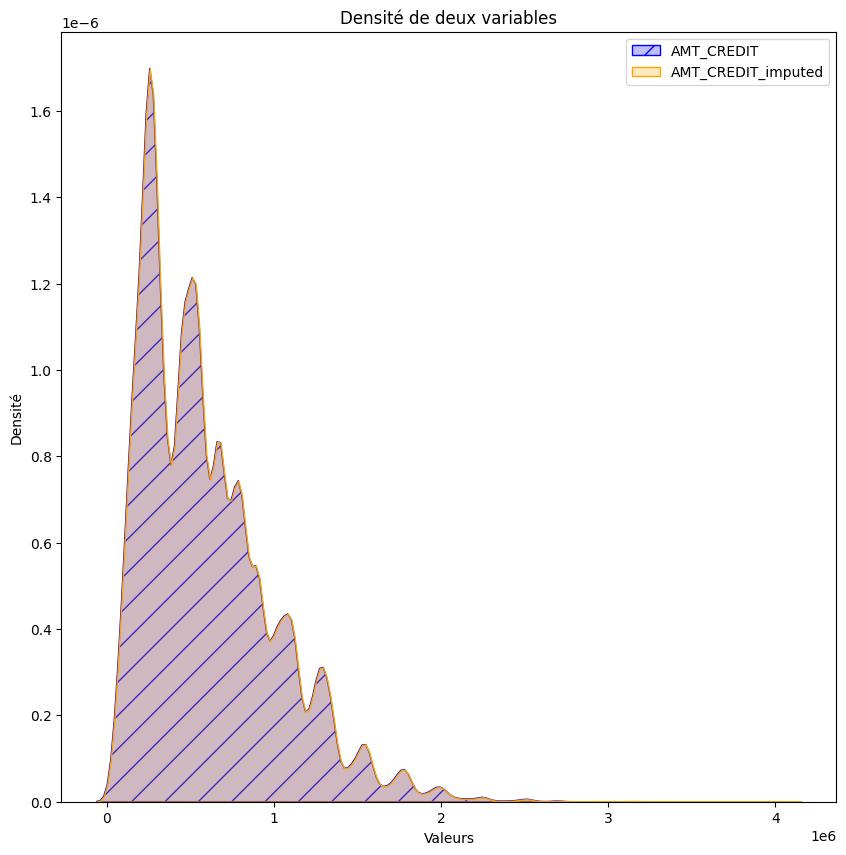

In [103]:
# Créer une figure 
fig = plt.figure(figsize=(10, 10))

# Tracer les histogrammes des deux variables dans un même graphe avec des lignes hachurées
sns.kdeplot(train_train['AMT_CREDIT'], shade=True, label='AMT_CREDIT', hatch='/', color='blue')
sns.kdeplot(train_mode_mediane['AMT_CREDIT'], shade=True, label='AMT_CREDIT_imputed', color='orange')

# Ajouter une légende
plt.legend(loc='upper right')

# Ajouter des titres et des étiquettes d'axes
plt.title('Densité de deux variables')
plt.xlabel('Valeurs')
plt.ylabel('Densité')

# Afficher le graphe
plt.show()



**Jeu de données de test**

c:\Windows\Temp\ipykernel_5272\720242884.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_test['AMT_CREDIT'], shade=True, label='AMT_CREDIT', hatch='/', color='blue')
c:\Windows\Temp\ipykernel_5272\720242884.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_mode_mediane['AMT_CREDIT'], shade=True, label='AMT_CREDIT_imputed', color='orange')


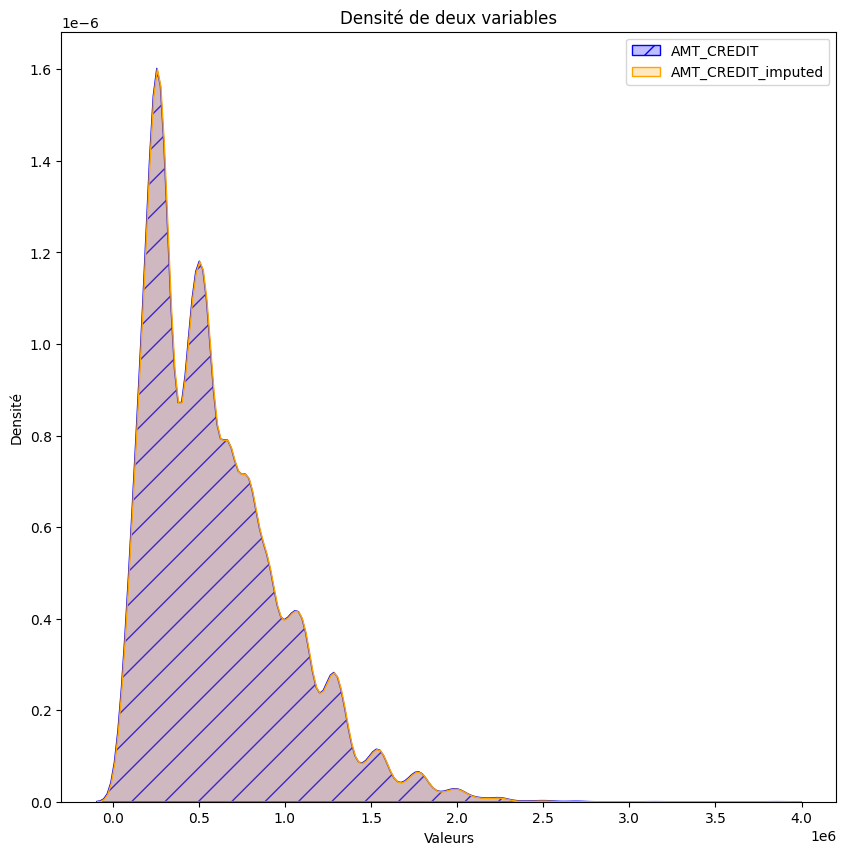

In [104]:
# Créer une figure 
fig = plt.figure(figsize=(10, 10))

# Tracer les histogrammes des deux variables dans un même graphe avec des lignes hachurées
sns.kdeplot(train_test['AMT_CREDIT'], shade=True, label='AMT_CREDIT', hatch='/', color='blue')
sns.kdeplot(test_mode_mediane['AMT_CREDIT'], shade=True, label='AMT_CREDIT_imputed', color='orange')

# Ajouter une légende
plt.legend(loc='upper right')

# Ajouter des titres et des étiquettes d'axes
plt.title('Densité de deux variables')
plt.xlabel('Valeurs')
plt.ylabel('Densité')

# Afficher le graphe
plt.show()



**Variable Binaire**

In [105]:
variables_binaires

['TARGET',
 'ORGANIZATION_TYPE_Transport: type 2',
 'HOUSETYPE_MODE_specific housing',
 'HOUSETYPE_MODE_block of flats',
 'FONDKAPREMONT_MODE_reg oper spec account',
 'FONDKAPREMONT_MODE_reg oper account',
 'FONDKAPREMONT_MODE_org spec account',
 'FONDKAPREMONT_MODE_not specified',
 'ORGANIZATION_TYPE_XNA',
 'ORGANIZATION_TYPE_University',
 'ORGANIZATION_TYPE_Transport: type 4',
 'ORGANIZATION_TYPE_Transport: type 3',
 'ORGANIZATION_TYPE_Transport: type 1',
 'WALLSMATERIAL_MODE_Block',
 'ORGANIZATION_TYPE_Trade: type 7',
 'ORGANIZATION_TYPE_Trade: type 6',
 'ORGANIZATION_TYPE_Trade: type 5',
 'ORGANIZATION_TYPE_Trade: type 4',
 'ORGANIZATION_TYPE_Trade: type 3',
 'ORGANIZATION_TYPE_Trade: type 2',
 'ORGANIZATION_TYPE_Trade: type 1',
 'ORGANIZATION_TYPE_Telecom',
 'ORGANIZATION_TYPE_Services',
 'ORGANIZATION_TYPE_Self-employed',
 'HOUSETYPE_MODE_terraced house',
 'WALLSMATERIAL_MODE_Mixed',
 'WALLSMATERIAL_MODE_Monolithic',
 'WALLSMATERIAL_MODE_Wooden',
 'WALLSMATERIAL_MODE_Stone, brick

**Jeu de données d'entrainement**

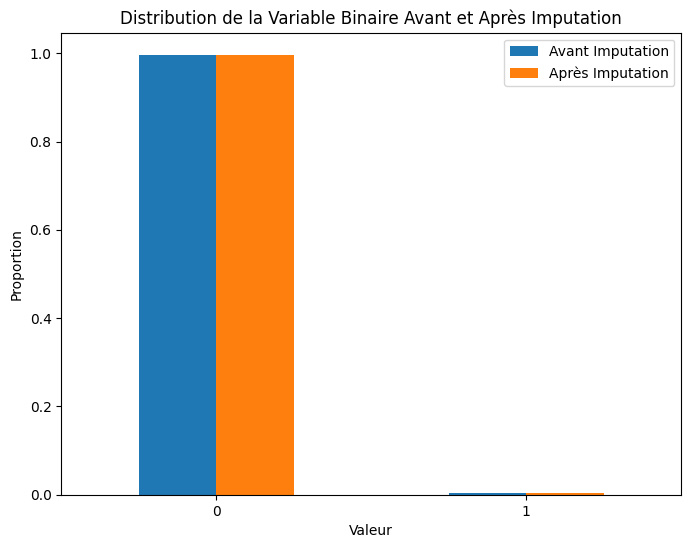

In [106]:
# Compter les occurrences pour chaque catégorie (0 et 1) avant et après imputation
counts_before = train_train['ORGANIZATION_TYPE_Hotel'].value_counts(normalize=True, dropna=False)
counts_after = train_mode_mediane['ORGANIZATION_TYPE_Hotel'].value_counts(normalize=True)

# Créer un DataFrame pour faciliter le tracé
counts_df = pd.DataFrame({'Avant Imputation': counts_before, 'Après Imputation': counts_after})

# Tracer les distributions avant et après imputation sur le même graphique
counts_df.plot(kind='bar', figsize=(8, 6))
plt.title('Distribution de la Variable Binaire Avant et Après Imputation')
plt.xlabel('Valeur')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend()
plt.show()


**Jeu de données de test**

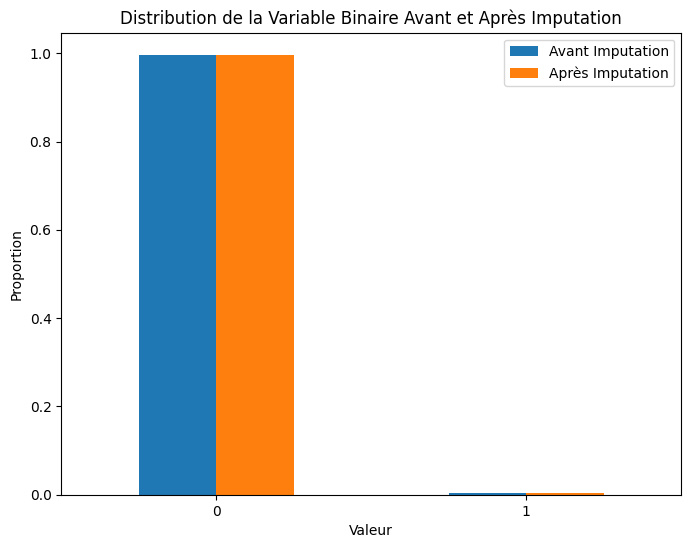

In [107]:
# Compter les occurrences pour chaque catégorie (0 et 1) avant et après imputation
counts_before = train_test['ORGANIZATION_TYPE_Hotel'].value_counts(normalize=True, dropna=False)
counts_after = test_mode_mediane['ORGANIZATION_TYPE_Hotel'].value_counts(normalize=True)

# Créer un DataFrame pour faciliter le tracé
counts_df = pd.DataFrame({'Avant Imputation': counts_before, 'Après Imputation': counts_after})

# Tracer les distributions avant et après imputation sur le même graphique
counts_df.plot(kind='bar', figsize=(8, 6))
plt.title('Distribution de la Variable Binaire Avant et Après Imputation')
plt.xlabel('Valeur')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend()
plt.show()

### <div class="alert alert-info"><font color='dimgray'>VI.3  Réduction de dimensionnalité </font> </div>

In [108]:
df_train=train_mode_mediane.copy()

In [109]:
df_train.shape

(183128, 559)

In [110]:
df_test=test_mode_mediane.copy()

In [111]:
df_test.shape

(45783, 559)

<div class="alert alert-success">
 
Une première étape de sélection des variables a impliqué l'élimination de celles présentant une unique valeur, indiquant ainsi une absence de variation. Cette démarche a conduit à l'identification et à la suppression de 19 variables, nous laissant avec 554 variables restantes. D'autres méthodes de sélection seront donc appliquées ultérieurement pour affiner notre ensemble de données.
    
</div>

<div class="alert alert-success">
 
Avec 574 variables restantes après avoir éliminé celles ayant plus de 50 % de valeurs manquantes, nous avons encore un large ensemble de données à analyser. Pour affiner davantage et réduire la dimensionnalité de cet dataset, nous pouvons envisager ld'autres méthodes pour l'élimination de variables supplémentaires : 
    
    
**Analyse de la Variance ou du Chi-deux pour les variables catégorielles**
Utilisez des tests statistiques pour évaluer la relation entre chaque variable catégorielle et la variable cible. Les variables qui ne montrent pas de relation significative peuvent être candidates à l'élimination.
    
**Importance des variables (Feature Importance)**
Utilisez des modèles de machine learning pour évaluer l'importance des caractéristiques. Les variables ayant une faible importance dans la prédiction de la variable cible peuvent être supprimées.
       
</div>

<div class="alert alert-success">
 
Voici la méthodologie qui nous avons adopter pour reduire la dimensionnalité de notre dataset. Cet ordre permet d'éliminer d'abord les variables basées sur des critères simples avant d'utiliser des méthodes plus complexes. 
   
**1. Test ANOVA et Chi-deux :**
Par la suite,nous utilisons le test ANOVA pour les variables continues et le test Chi-deux pour les variables catégorielles/binaires afin d'évaluer leur relation avec la variable cible.
    
**2. Importance des caractéristiques avec LightGBM**:
Enfin, unous utilisons LightGBM pour évaluer l'importance des caractéristiques.
</div>

In [112]:
# faire une copy
df_train_reduced = df_train.copy()

In [113]:
df_train.shape, df_train_reduced.shape

((183128, 559), (183128, 559))

### <div class="alert alert-info"><font color='dimgray'>VI.3.1  Analyse de la Variance ou du Chi-deux pour les variables catégorielles </font> </div>

In [114]:
df_train_reduced.dtypes.value_counts()

float64    390
float16    169
Name: count, dtype: int64

In [115]:
# Identifions les variables catégorielles :
bool_cols = [col for col in df_train_reduced 
             if np.isin(df_train_reduced[col].dropna().unique(), [0, 1]).all()]

In [116]:
bool_cols

['TARGET',
 'ORGANIZATION_TYPE_Transport: type 2',
 'HOUSETYPE_MODE_specific housing',
 'HOUSETYPE_MODE_block of flats',
 'FONDKAPREMONT_MODE_reg oper spec account',
 'FONDKAPREMONT_MODE_reg oper account',
 'FONDKAPREMONT_MODE_org spec account',
 'FONDKAPREMONT_MODE_not specified',
 'ORGANIZATION_TYPE_XNA',
 'ORGANIZATION_TYPE_University',
 'ORGANIZATION_TYPE_Transport: type 4',
 'ORGANIZATION_TYPE_Transport: type 3',
 'ORGANIZATION_TYPE_Transport: type 1',
 'WALLSMATERIAL_MODE_Block',
 'ORGANIZATION_TYPE_Trade: type 7',
 'ORGANIZATION_TYPE_Trade: type 6',
 'ORGANIZATION_TYPE_Trade: type 5',
 'ORGANIZATION_TYPE_Trade: type 4',
 'ORGANIZATION_TYPE_Trade: type 3',
 'ORGANIZATION_TYPE_Trade: type 2',
 'ORGANIZATION_TYPE_Trade: type 1',
 'ORGANIZATION_TYPE_Telecom',
 'ORGANIZATION_TYPE_Services',
 'ORGANIZATION_TYPE_Self-employed',
 'HOUSETYPE_MODE_terraced house',
 'WALLSMATERIAL_MODE_Mixed',
 'WALLSMATERIAL_MODE_Monolithic',
 'WALLSMATERIAL_MODE_Wooden',
 'WALLSMATERIAL_MODE_Stone, brick

In [117]:
liste_variables = df_train_reduced.columns.to_list()

In [118]:
# Isolons les variables numériques des variables catégorielles :
from collections import Counter
liste_variables_numeriques = list((Counter(liste_variables)-Counter(bool_cols)).elements())

In [119]:
len(liste_variables), len(bool_cols), len(liste_variables_numeriques)

(559, 169, 390)

In [120]:
# Exclure la variable cible 
variables_cat = [variable for variable in bool_cols if variable != 'TARGET']

In [121]:
len(variables_cat)

168

**Test du Chi-deux pour les variables catégorielles**

<div class="alert alert-success">
 
Le test du Chi-deux est utilisé pour déterminer si une association significative existe entre une variable catégorielle et la variable cible (également catégorielle).
    
</div>

In [122]:
from sklearn.feature_selection import SelectKBest, chi2

X_cat = df_train_reduced[variables_cat]  # Les variables catégorielles
y = df_train_reduced['TARGET']  # La variable cible


In [123]:
len(X_cat), len(y)

(183128, 183128)

In [124]:
# Application du test du Chi-deux
chi_selector = SelectKBest(chi2, k='all')  # 'k' peut être ajusté selon le nombre de features que vous souhaitez sélectionner
chi_selector.fit(X_cat, y)

SelectKBest(k='all', score_func=<function chi2 at 0x000001B450114EE0>)

In [125]:
# Obtenir les scores et les p-values pour chaque variable catégorielle
chi_scores = pd.DataFrame({'variable': variables_cat, 'score': chi_selector.scores_, 'p_value': chi_selector.pvalues_})
chi_scores = chi_scores.sort_values(by='score', ascending=False)

In [126]:
chi_scores

variable  \
46                                 NAME_EDUCATION_TYPE_Higher education   
102                                              REG_CITY_NOT_WORK_CITY   
107                                                       CODE_GENDER_M   
52                                           NAME_INCOME_TYPE_Pensioner   
7                                                 ORGANIZATION_TYPE_XNA   
90                                               REG_CITY_NOT_LIVE_CITY   
79                                             OCCUPATION_TYPE_Laborers   
48                                             NAME_INCOME_TYPE_Working   
108                                                       CODE_GENDER_F   
101                                                  NAME_CONTRACT_TYPE   
103                                             LIVE_CITY_NOT_WORK_CITY   
33                                       NAME_HOUSING_TYPE_With parents   
28                                             WALLSMATERIAL_MODE_Panel   
83                                              OCCUPATION_TYPE_Drivers   
78                                   OCCUPATION_TYPE_Low-skill Laborers   
2                                         HOUSETYPE_MODE_block of flats   
22                                      ORGANIZATION_TYPE_Self-employed   
123                                                     FLAG_DOCUMENT_6   
97                                                      FLAG_WORK_PHONE   
43                    NAME_EDUCATION_TYPE_Secondary / secondary special   
51                                       NAME_INCOME_TYPE_State servant   
58                                          OCCUPATION_TYPE_Accountants   
134                            ORGANIZATION_TYPE_Business Entity Type 3   
126                                                     FLAG_DOCUMENT_3   
39                              NAME_FAMILY_STATUS_Single / not married   
151                                      ORGANIZATION_TYPE_Construction   
38                                             NAME_FAMILY_STATUS_Widow   
42                                    NAME_FAMILY_STATUS_Civil marriage   
73                                          OCCUPATION_TYPE_Sales staff   
84                                           OCCUPATION_TYPE_Core staff   
4                                   FONDKAPREMONT_MODE_reg oper account   
98                                                       FLAG_EMP_PHONE   
95                                                           FLAG_PHONE   
77                                             OCCUPATION_TYPE_Managers   
57                                   NAME_HOUSING_TYPE_Rented apartment   
100                                                        FLAG_OWN_CAR   
32                                             ORGANIZATION_TYPE_School   
71                                       OCCUPATION_TYPE_Security staff   
10                                  ORGANIZATION_TYPE_Transport: type 3   
81                                OCCUPATION_TYPE_High skill tech staff   
114                                                    FLAG_DOCUMENT_16   
85                                        OCCUPATION_TYPE_Cooking staff   
49                                          NAME_INCOME_TYPE_Unemployed   
143                                          ORGANIZATION_TYPE_Medicine   
41                                           NAME_FAMILY_STATUS_Married   
104                                        ORGANIZATION_TYPE_Restaurant   
159                                          ORGANIZATION_TYPE_Military   
5                                   FONDKAPREMONT_MODE_org spec account   
160                                            ORGANIZATION_TYPE_Police   
44                                  NAME_EDUCATION_TYPE_Lower secondary   
141                                  ORGANIZATION_TYPE_Industry: type 3   
150                                        ORGANIZATION_TYPE_Government   
112                                                    FLAG_DOCUMENT_18   
17           

In [127]:
# Sélectionner les variables avec les scores les plus élevés ou p-values les plus basses
variables_cat_importantes = chi_scores[chi_scores['p_value'] < 0.05]['variable']  # sélectionner celles avec p-value < 0.05

In [128]:
variables_cat_importantes

46                  NAME_EDUCATION_TYPE_Higher education
102                               REG_CITY_NOT_WORK_CITY
107                                        CODE_GENDER_M
52                            NAME_INCOME_TYPE_Pensioner
7                                  ORGANIZATION_TYPE_XNA
90                                REG_CITY_NOT_LIVE_CITY
79                              OCCUPATION_TYPE_Laborers
48                              NAME_INCOME_TYPE_Working
108                                        CODE_GENDER_F
101                                   NAME_CONTRACT_TYPE
103                              LIVE_CITY_NOT_WORK_CITY
33                        NAME_HOUSING_TYPE_With parents
28                              WALLSMATERIAL_MODE_Panel
83                               OCCUPATION_TYPE_Drivers
78                    OCCUPATION_TYPE_Low-skill Laborers
2                          HOUSETYPE_MODE_block of flats
22                       ORGANIZATION_TYPE_Self-employed
123                            

In [129]:
len(variables_cat_importantes)

95

**Analyse de la Variance (ANOVA) pour les variables continues**

<div class="alert alert-success">
 
L'ANOVA est utilisée pour examiner l'influence des variables continues sur une variable cible catégorielle.
    
</div>

In [130]:
len(liste_variables_numeriques)

390

In [131]:
# Exclure la identifiant "SK_ID_CURR"
variables_num = [variable for variable in liste_variables_numeriques if variable != 'SK_ID_CURR']

In [132]:
len(liste_variables_numeriques),len(variables_num)

(390, 389)

In [133]:
from sklearn.feature_selection import f_classif

X_cont = df_train_reduced[variables_num]  # Les variables continues

# Application de l'ANOVA
f_selector = SelectKBest(f_classif, k='all')  # 'k' peut être ajusté selon le nombre de features que vous souhaitez sélectionner
f_selector.fit(X_cont, y)

SelectKBest(k='all')

In [134]:
# Obtenir les scores et les p-values pour chaque variable continue
f_scores = pd.DataFrame({'variable': variables_num, 'score': f_selector.scores_, 'p_value': f_selector.pvalues_})
f_scores = f_scores.sort_values(by='score', ascending=False)

In [135]:
f_scores

variable  \
316                                                           EXT_SOURCE_3   
207                                                           EXT_SOURCE_2   
293                                                  BURO_DAYS_CREDIT_MEAN   
32                                  PREV_NAME_CONTRACT_STATUS_Refused_MEAN   
134                                       PREV_CODE_REJECT_REASON_XAP_MEAN   
33                                 PREV_NAME_CONTRACT_STATUS_Approved_MEAN   
167                                                             DAYS_BIRTH   
282                                         BURO_CREDIT_ACTIVE_Closed_MEAN   
284                                         BURO_CREDIT_ACTIVE_Active_MEAN   
296                                                   BURO_DAYS_CREDIT_MIN   
292                                           BURO_DAYS_CREDIT_UPDATE_MEAN   
87                                     PREV_NAME_PRODUCT_TYPE_walk-in_MEAN   
338                                                          DAYS_EMPLOYED   
25                                         PREV_CODE_REJECT_REASON_HC_MEAN   
90                                          PREV_NAME_YIELD_GROUP_XNA_MEAN   
331                                                CLOSED_DAYS_CREDIT_MEAN   
337                                                     DAYS_EMPLOYED_PERC   
66                                      PREV_CODE_REJECT_REASON_SCOFR_MEAN   
162                                            REGION_RATING_CLIENT_W_CITY   
329                                                 CLOSED_DAYS_CREDIT_MIN   
174                                                 DAYS_LAST_PHONE_CHANGE   
163                                                   REGION_RATING_CLIENT   
346                                                ACTIVE_DAYS_CREDIT_MEAN   
50                                                 PREV_DAYS_DECISION_MEAN   
52                                                  PREV_DAYS_DECISION_MIN   
225                                             APPROVED_DAYS_DECISION_MIN   
114                                           PREV_NAME_PORTFOLIO_POS_MEAN   
197                                         INSTAL_DAYS_ENTRY_PAYMENT_MEAN   
285                                                   BURO_DAYS_CREDIT_MAX   
46                             PREV_NAME_CONTRACT_TYPE_Consumer loans_MEAN   
354                                                 ACTIVE_DAYS_CREDIT_MAX   
45                            PREV_NAME_CONTRACT_TYPE_Revolving loans_MEAN   
165                                                        DAYS_ID_PUBLISH   
109                              PREV_PRODUCT_COMBINATION_Card Street_MEAN   
142                                      PREV_NAME_GOODS_CATEGORY_XNA_MEAN   
27                                         PREV_NAME_PAYMENT_TYPE_XNA_MEAN   
30                       PREV_NAME_PAYMENT_TYPE_Cash through the bank_MEAN   
301                                          BURO_DAYS_CREDIT_ENDDATE_MEAN   
277                                        BURO_CREDIT_TYPE_Microloan_MEAN   
111                                  PREV_NAME_YIELD_GROUP_low_normal_MEAN   
357                                         ACTIVE_DAYS_CREDIT_ENDDATE_MAX   
223                                            APPROVED_DAYS_DECISION_MEAN   
113                                           PREV_NAME_PORTFOLIO_XNA_MEAN   
89                                      PREV_NAME_SELLER_INDUSTRY_XNA_MEAN   
85                                  PREV_CHANNEL_TYPE_AP+ (Cash loan)_MEAN   
212                                              APPROVED_AMT_ANNUITY_MEAN   
65                                      PREV_CODE_REJECT_REASON_LIMIT_MEAN   
324                                         CLOSED_DAYS_CREDIT_UPDATE_MEAN   
141                                         PREV_NAME_PORTFOLIO_Cards_MEAN   
166                                                      DAYS_REGISTRATION   
173                                                    EMERGENCYSTATE_MODE   
227       

In [136]:
# Sélectionner les variables avec les scores les plus élevés ou p-values les plus basses
variables_cont_importantes = f_scores[f_scores['p_value'] < 0.05]['variable']  # Par exemple, sélectionner celles avec p-value < 0.05

In [137]:
variables_cont_importantes

316                                                     EXT_SOURCE_3
207                                                     EXT_SOURCE_2
293                                            BURO_DAYS_CREDIT_MEAN
32                            PREV_NAME_CONTRACT_STATUS_Refused_MEAN
134                                 PREV_CODE_REJECT_REASON_XAP_MEAN
33                           PREV_NAME_CONTRACT_STATUS_Approved_MEAN
167                                                       DAYS_BIRTH
282                                   BURO_CREDIT_ACTIVE_Closed_MEAN
284                                   BURO_CREDIT_ACTIVE_Active_MEAN
296                                             BURO_DAYS_CREDIT_MIN
292                                     BURO_DAYS_CREDIT_UPDATE_MEAN
87                               PREV_NAME_PRODUCT_TYPE_walk-in_MEAN
338                                                    DAYS_EMPLOYED
25                                   PREV_CODE_REJECT_REASON_HC_MEAN
90                                

In [138]:
len(liste_variables_numeriques), len(variables_num),len(variables_cont_importantes)

(390, 389, 287)

In [139]:
# Nettoyage pour éliminer les valeurs NaN (si nécessaire)
#variables_cont_importantes = [x for x in variables_cont_importantes if pd.notna(x)]
#variables_cat_importantes = [x for x in variables_cat_importantes if pd.notna(x)]

In [140]:
liste_variables_numeriques

['SK_ID_CURR',
 'PREV_CODE_REJECT_REASON_SCO_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Gasification / water supply_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Furniture_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Everyday expenses_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Education_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Car repairs_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a used car_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a new car_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a home_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Buying a garage_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Business development_MEAN',
 'PREV_NAME_CASH_LOAN_PURPOSE_Building a house or an annex_MEAN',
 'PREV_FLAG_LAST_APPL_PER_CONTRACT_Y_MEAN',
 'PREV_FLAG_LAST_APPL_PER_CONTRACT_N_MEAN',
 'PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_MEAN',
 'PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_MEAN',
 'PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY_MEAN',
 'PREV_WEEKDAY_APPR_PROCESS_START_SUNDAY_MEA

In [141]:
#variables_cont_importantes=variables_cont_importantes.tolist()

In [142]:
variables_cont_importantes

316                                                     EXT_SOURCE_3
207                                                     EXT_SOURCE_2
293                                            BURO_DAYS_CREDIT_MEAN
32                            PREV_NAME_CONTRACT_STATUS_Refused_MEAN
134                                 PREV_CODE_REJECT_REASON_XAP_MEAN
33                           PREV_NAME_CONTRACT_STATUS_Approved_MEAN
167                                                       DAYS_BIRTH
282                                   BURO_CREDIT_ACTIVE_Closed_MEAN
284                                   BURO_CREDIT_ACTIVE_Active_MEAN
296                                             BURO_DAYS_CREDIT_MIN
292                                     BURO_DAYS_CREDIT_UPDATE_MEAN
87                               PREV_NAME_PRODUCT_TYPE_walk-in_MEAN
338                                                    DAYS_EMPLOYED
25                                   PREV_CODE_REJECT_REASON_HC_MEAN
90                                

In [143]:
len(variables_cont_importantes)

287

In [144]:
len(liste_variables_numeriques)

390

In [145]:
variables_cont_importantes = variables_cont_importantes.tolist()
if 'SK_ID_CURR' not in variables_cont_importantes:
        variables_cont_importantes.append('SK_ID_CURR')

In [146]:
len(variables_cont_importantes)

288

In [147]:
variables_cont_importantes

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'BURO_DAYS_CREDIT_MEAN',
 'PREV_NAME_CONTRACT_STATUS_Refused_MEAN',
 'PREV_CODE_REJECT_REASON_XAP_MEAN',
 'PREV_NAME_CONTRACT_STATUS_Approved_MEAN',
 'DAYS_BIRTH',
 'BURO_CREDIT_ACTIVE_Closed_MEAN',
 'BURO_CREDIT_ACTIVE_Active_MEAN',
 'BURO_DAYS_CREDIT_MIN',
 'BURO_DAYS_CREDIT_UPDATE_MEAN',
 'PREV_NAME_PRODUCT_TYPE_walk-in_MEAN',
 'DAYS_EMPLOYED',
 'PREV_CODE_REJECT_REASON_HC_MEAN',
 'PREV_NAME_YIELD_GROUP_XNA_MEAN',
 'CLOSED_DAYS_CREDIT_MEAN',
 'DAYS_EMPLOYED_PERC',
 'PREV_CODE_REJECT_REASON_SCOFR_MEAN',
 'REGION_RATING_CLIENT_W_CITY',
 'CLOSED_DAYS_CREDIT_MIN',
 'DAYS_LAST_PHONE_CHANGE',
 'REGION_RATING_CLIENT',
 'ACTIVE_DAYS_CREDIT_MEAN',
 'PREV_DAYS_DECISION_MEAN',
 'PREV_DAYS_DECISION_MIN',
 'APPROVED_DAYS_DECISION_MIN',
 'PREV_NAME_PORTFOLIO_POS_MEAN',
 'INSTAL_DAYS_ENTRY_PAYMENT_MEAN',
 'BURO_DAYS_CREDIT_MAX',
 'PREV_NAME_CONTRACT_TYPE_Consumer loans_MEAN',
 'ACTIVE_DAYS_CREDIT_MAX',
 'PREV_NAME_CONTRACT_TYPE_Revolving loans_MEAN',
 'DAYS_ID_PU

In [148]:
#ajouter SK_ID_CURR à la liste des variables continue
#variables_cont_importantes_ID = [var for var in liste_variables_numeriques if var in variables_cont_importantes or var == 'SK_ID_CURR']

In [149]:
variables_cont_importantes_ID=variables_cont_importantes

In [150]:
len(variables_cont_importantes_ID)

288

In [151]:
variables_cat_importantes

46                  NAME_EDUCATION_TYPE_Higher education
102                               REG_CITY_NOT_WORK_CITY
107                                        CODE_GENDER_M
52                            NAME_INCOME_TYPE_Pensioner
7                                  ORGANIZATION_TYPE_XNA
90                                REG_CITY_NOT_LIVE_CITY
79                              OCCUPATION_TYPE_Laborers
48                              NAME_INCOME_TYPE_Working
108                                        CODE_GENDER_F
101                                   NAME_CONTRACT_TYPE
103                              LIVE_CITY_NOT_WORK_CITY
33                        NAME_HOUSING_TYPE_With parents
28                              WALLSMATERIAL_MODE_Panel
83                               OCCUPATION_TYPE_Drivers
78                    OCCUPATION_TYPE_Low-skill Laborers
2                          HOUSETYPE_MODE_block of flats
22                       ORGANIZATION_TYPE_Self-employed
123                            

In [152]:
# Concaténer les deux listes pour obtenir la liste totale des variables importantes
variables_importantes = variables_cat_importantes.tolist() + variables_cont_importantes_ID

In [153]:
len(variables_importantes)

383

In [154]:
variables_importantes

['NAME_EDUCATION_TYPE_Higher education',
 'REG_CITY_NOT_WORK_CITY',
 'CODE_GENDER_M',
 'NAME_INCOME_TYPE_Pensioner',
 'ORGANIZATION_TYPE_XNA',
 'REG_CITY_NOT_LIVE_CITY',
 'OCCUPATION_TYPE_Laborers',
 'NAME_INCOME_TYPE_Working',
 'CODE_GENDER_F',
 'NAME_CONTRACT_TYPE',
 'LIVE_CITY_NOT_WORK_CITY',
 'NAME_HOUSING_TYPE_With parents',
 'WALLSMATERIAL_MODE_Panel',
 'OCCUPATION_TYPE_Drivers',
 'OCCUPATION_TYPE_Low-skill Laborers',
 'HOUSETYPE_MODE_block of flats',
 'ORGANIZATION_TYPE_Self-employed',
 'FLAG_DOCUMENT_6',
 'FLAG_WORK_PHONE',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_INCOME_TYPE_State servant',
 'OCCUPATION_TYPE_Accountants',
 'ORGANIZATION_TYPE_Business Entity Type 3',
 'FLAG_DOCUMENT_3',
 'NAME_FAMILY_STATUS_Single / not married',
 'ORGANIZATION_TYPE_Construction',
 'NAME_FAMILY_STATUS_Widow',
 'NAME_FAMILY_STATUS_Civil marriage',
 'OCCUPATION_TYPE_Sales staff',
 'OCCUPATION_TYPE_Core staff',
 'FONDKAPREMONT_MODE_reg oper account',
 'FLAG_EMP_PHONE',
 'FLAG_P

In [155]:
variables_importantes

['NAME_EDUCATION_TYPE_Higher education',
 'REG_CITY_NOT_WORK_CITY',
 'CODE_GENDER_M',
 'NAME_INCOME_TYPE_Pensioner',
 'ORGANIZATION_TYPE_XNA',
 'REG_CITY_NOT_LIVE_CITY',
 'OCCUPATION_TYPE_Laborers',
 'NAME_INCOME_TYPE_Working',
 'CODE_GENDER_F',
 'NAME_CONTRACT_TYPE',
 'LIVE_CITY_NOT_WORK_CITY',
 'NAME_HOUSING_TYPE_With parents',
 'WALLSMATERIAL_MODE_Panel',
 'OCCUPATION_TYPE_Drivers',
 'OCCUPATION_TYPE_Low-skill Laborers',
 'HOUSETYPE_MODE_block of flats',
 'ORGANIZATION_TYPE_Self-employed',
 'FLAG_DOCUMENT_6',
 'FLAG_WORK_PHONE',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_INCOME_TYPE_State servant',
 'OCCUPATION_TYPE_Accountants',
 'ORGANIZATION_TYPE_Business Entity Type 3',
 'FLAG_DOCUMENT_3',
 'NAME_FAMILY_STATUS_Single / not married',
 'ORGANIZATION_TYPE_Construction',
 'NAME_FAMILY_STATUS_Widow',
 'NAME_FAMILY_STATUS_Civil marriage',
 'OCCUPATION_TYPE_Sales staff',
 'OCCUPATION_TYPE_Core staff',
 'FONDKAPREMONT_MODE_reg oper account',
 'FLAG_EMP_PHONE',
 'FLAG_P

In [156]:
df_train_reduced_important = df_train_reduced[variables_importantes]

In [157]:
df_train_reduced_important.shape

(183128, 383)

In [158]:
# Ajouter la variable cible au train 
if 'TARGET' not in df_train_reduced_important.columns:
    df_train_reduced_important['TARGET'] = df_train_reduced['TARGET']

c:\Windows\Temp\ipykernel_5272\3573655697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_reduced_important['TARGET'] = df_train_reduced['TARGET']


In [159]:
df_train_reduced_important.shape

(183128, 384)

In [160]:
df_test_reduced_important=df_test[variables_importantes]

In [161]:
df_test_reduced_important.shape

(45783, 383)

In [162]:
# Ajouter la variable cible au test
if 'TARGET' not in df_test_reduced_important.columns:
    df_test_reduced_important['TARGET'] = df_test['TARGET']

c:\Windows\Temp\ipykernel_5272\1508529143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_reduced_important['TARGET'] = df_test['TARGET']


In [163]:
df_test_reduced_important.shape

(45783, 384)

In [164]:
df_test_reduced_important.columns.tolist()

['NAME_EDUCATION_TYPE_Higher education',
 'REG_CITY_NOT_WORK_CITY',
 'CODE_GENDER_M',
 'NAME_INCOME_TYPE_Pensioner',
 'ORGANIZATION_TYPE_XNA',
 'REG_CITY_NOT_LIVE_CITY',
 'OCCUPATION_TYPE_Laborers',
 'NAME_INCOME_TYPE_Working',
 'CODE_GENDER_F',
 'NAME_CONTRACT_TYPE',
 'LIVE_CITY_NOT_WORK_CITY',
 'NAME_HOUSING_TYPE_With parents',
 'WALLSMATERIAL_MODE_Panel',
 'OCCUPATION_TYPE_Drivers',
 'OCCUPATION_TYPE_Low-skill Laborers',
 'HOUSETYPE_MODE_block of flats',
 'ORGANIZATION_TYPE_Self-employed',
 'FLAG_DOCUMENT_6',
 'FLAG_WORK_PHONE',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_INCOME_TYPE_State servant',
 'OCCUPATION_TYPE_Accountants',
 'ORGANIZATION_TYPE_Business Entity Type 3',
 'FLAG_DOCUMENT_3',
 'NAME_FAMILY_STATUS_Single / not married',
 'ORGANIZATION_TYPE_Construction',
 'NAME_FAMILY_STATUS_Widow',
 'NAME_FAMILY_STATUS_Civil marriage',
 'OCCUPATION_TYPE_Sales staff',
 'OCCUPATION_TYPE_Core staff',
 'FONDKAPREMONT_MODE_reg oper account',
 'FLAG_EMP_PHONE',
 'FLAG_P

### <div class="alert alert-info"><font color='dimgray'>VI.3.2  Sélection de variables avec la méthode RFECV</font> </div>

In [165]:
test=test[variables_importantes]

In [166]:
test.shape, df_train_reduced_important.shape, df_test_reduced_important.shape

((48744, 383), (183128, 384), (45783, 384))

In [167]:
# Normaliser les noms de colonnes
#df_train_reduced_important.columns = df_train_reduced_important.columns.str.strip()  # Enlève les espaces aux extrémités
#df_train_reduced_important.columns = df_train_reduced_important.columns.str.replace(' ', '_')  # Remplace les espaces par des underscores
#df_train_reduced_important.columns = df_train_reduced_important.columns.str.replace(r'[^\w\s]', '')  # Enlève les caractères spéciaux
#df_train_reduced_important.columns = df_train_reduced_important.columns.str.lower()  # Convertit en minuscules

#df_test_reduced_important.columns = df_test_reduced_important.columns.str.strip()  # Enlève les espaces aux extrémités
#df_test_reduced_important.columns = df_test_reduced_important.columns.str.replace(' ', '_')  # Remplace les espaces par des underscores
#df_test_reduced_important.columns = df_test_reduced_important.columns.str.replace(r'[^\w\s]', '')  # Enlève les caractères spéciaux
#df_test_reduced_important.columns = df_test_reduced_important.columns.str.lower()  # Convertit en minuscules

#test.columns = test.columns.str.strip()  # Enlève les espaces aux extrémités
#test.columns = test.columns.str.replace(' ', '_')  # Remplace les espaces par des underscores
#test.columns = test.columns.str.replace(r'[^\w\s]', '')  # Enlève les caractères spéciaux
#test.columns = test.columns.str.lower()  # Convertit en minuscules

In [168]:
df_train_reduced_important.head()

NAME_EDUCATION_TYPE_Higher education  REG_CITY_NOT_WORK_CITY  \
109048                                   0.0                     0.0   
128218                                   0.0                     1.0   
26763                                    0.0                     0.0   
136162                                   0.0                     0.0   
83903                                    0.0                     0.0   

        CODE_GENDER_M  NAME_INCOME_TYPE_Pensioner  ORGANIZATION_TYPE_XNA  \
109048            0.0                         1.0                    1.0   
128218            1.0                         0.0                    0.0   
26763             0.0                         0.0                    0.0   
136162            0.0                         0.0                    0.0   
83903             0.0                         0.0                    0.0   

        REG_CITY_NOT_LIVE_CITY  OCCUPATION_TYPE_Laborers  \
109048                     0.0                       0.0   
128218                     0.0                       0.0   
26763                      0.0                       0.0   
136162                     0.0                       0.0   
83903                      0.0                       0.0   

        NAME_INCOME_TYPE_Working  CODE_GENDER_F  NAME_CONTRACT_TYPE  \
109048                       0.0            1.0                 0.0   
128218                       1.0            0.0                 0.0   
26763                        1.0            1.0                 0.0   
136162                       1.0            1.0                 0.0   
83903                        1.0            1.0                 0.0   

        LIVE_CITY_NOT_WORK_CITY  NAME_HOUSING_TYPE_With parents  \
109048                      0.0                             0.0   
128218                      1.0                             0.0   
26763                       0.0                             0.0   
136162                      0.0                             0.0   
83903                       0.0                             0.0   

        WALLSMATERIAL_MODE_Panel  OCCUPATION_TYPE_Drivers  \
109048                       1.0                      0.0   
128218                       0.0                      0.0   
26763                        0.0                      0.0   
136162                       0.0                      0.0   
83903                        0.0                      0.0   

        OCCUPATION_TYPE_Low-skill Laborers  HOUSETYPE_MODE_block of flats  \
109048                                 0.0                            1.0   
128218                                 0.0                            1.0   
26763                                  0.0                            0.0   
136162                                 0.0                            0.0   
83903                                  0.0                            1.0   

        ORGANIZATION_TYPE_Self-employed  FLAG_DOCUMENT_6  FLAG_WORK_PHONE  \
109048                              0.0              0.0              0.0   
128218                              0.0              0.0              0.0   
26763                               0.0              0.0              0.0   
136162                              1.0              0.0              0.0   
83903                               0.0              0.0              0.0   

        NAME_EDUCATION_TYPE_Secondary / secondary special  \
109048                                                1.0   
128218                                                1.0   
26763                                                 1.0   
136162                                                1.0   
83903                                                 1.0   

        NAME_INCOME_TYPE_State servant  OCCUPATION_TYPE_Accountants  \
109048                             0.0                          0.0   
128218                             0.0                          0.0   
26763                              0.0                

In [169]:
df_train_reduced_important.columns.tolist()

['NAME_EDUCATION_TYPE_Higher education',
 'REG_CITY_NOT_WORK_CITY',
 'CODE_GENDER_M',
 'NAME_INCOME_TYPE_Pensioner',
 'ORGANIZATION_TYPE_XNA',
 'REG_CITY_NOT_LIVE_CITY',
 'OCCUPATION_TYPE_Laborers',
 'NAME_INCOME_TYPE_Working',
 'CODE_GENDER_F',
 'NAME_CONTRACT_TYPE',
 'LIVE_CITY_NOT_WORK_CITY',
 'NAME_HOUSING_TYPE_With parents',
 'WALLSMATERIAL_MODE_Panel',
 'OCCUPATION_TYPE_Drivers',
 'OCCUPATION_TYPE_Low-skill Laborers',
 'HOUSETYPE_MODE_block of flats',
 'ORGANIZATION_TYPE_Self-employed',
 'FLAG_DOCUMENT_6',
 'FLAG_WORK_PHONE',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_INCOME_TYPE_State servant',
 'OCCUPATION_TYPE_Accountants',
 'ORGANIZATION_TYPE_Business Entity Type 3',
 'FLAG_DOCUMENT_3',
 'NAME_FAMILY_STATUS_Single / not married',
 'ORGANIZATION_TYPE_Construction',
 'NAME_FAMILY_STATUS_Widow',
 'NAME_FAMILY_STATUS_Civil marriage',
 'OCCUPATION_TYPE_Sales staff',
 'OCCUPATION_TYPE_Core staff',
 'FONDKAPREMONT_MODE_reg oper account',
 'FLAG_EMP_PHONE',
 'FLAG_P

<div class="alert alert-success">
 
La méthode de sélection de variables **RFECV** signifie **Recursive Feature Elimination with Cross-Validation** (Élimination Récursive des Caractéristiques avec Validation Croisée). C'est une technique robuste pour la sélection des caractéristiques **les plus significatives pour un modèle prédictif**. Elle combine l'élimination récursive des caractéristiques (RFE) avec la validation croisée pour améliorer la robustesse de la sélection et éviter le surajustement.
    
</div>

In [170]:
# Préparation des données pour la modélisation :
X_train = df_train_reduced_important.drop(columns=['TARGET', 'SK_ID_CURR'])
y_train = df_train_reduced_important['TARGET']


In [171]:
X_test = df_test_reduced_important.drop(columns=['TARGET', 'SK_ID_CURR'])
y_test = df_test_reduced_important['TARGET']

In [172]:
X_train.shape, X_test.shape

((183128, 382), (45783, 382))

In [173]:
y_train.shape, y_test.shape

((183128,), (45783,))

In [174]:
import time
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier

In [175]:
# Démarrage du chronomètre pour suivre le temps d'exécution
start = time.time()

# Initialisation et ajustement de RFECV
rfecv = RFECV(estimator=LGBMClassifier(objective='binary'), 
              cv=StratifiedKFold(5),
              scoring='roc_auc',
              step=5,
              verbose=2,
              n_jobs=-1)

rfecv.fit(X_train, y_train)

# Calcul du temps d'exécution
end = time.time()
print(f"RFECV exécuté en {end - start} secondes")

Fitting estimator with 382 features.
[LightGBM] [Info] Number of positive: 14487, number of negative: 168641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.477720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 49621
[LightGBM] [Info] Number of data points in the train set: 183128, number of used features: 378
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.079109 -> initscore=-2.454520
[LightGBM] [Info] Start training from score -2.454520
Fitting estimator with 377 features.
[LightGBM] [Info] Number of positive: 14487, number of negative: 168641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.451827 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 49596
[LightGBM] [Info] Number of data points in the train set: 183128, number of used features: 374
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.079109 -> init

In [176]:
# Visualiser les résultats
print("Nombre optimal de caractéristiques sélectionnées :", rfecv.n_features_)

Nombre optimal de caractéristiques sélectionnées : 247


In [177]:
# Obtenir les colonnes sélectionnées par RFECV
selected_features = X_train.columns[rfecv.support_]

In [178]:
selected_features.tolist()

['NAME_EDUCATION_TYPE_Higher education',
 'CODE_GENDER_M',
 'REG_CITY_NOT_LIVE_CITY',
 'OCCUPATION_TYPE_Laborers',
 'NAME_INCOME_TYPE_Working',
 'NAME_CONTRACT_TYPE',
 'WALLSMATERIAL_MODE_Panel',
 'OCCUPATION_TYPE_Drivers',
 'OCCUPATION_TYPE_Low-skill Laborers',
 'ORGANIZATION_TYPE_Self-employed',
 'FLAG_WORK_PHONE',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_INCOME_TYPE_State servant',
 'OCCUPATION_TYPE_Accountants',
 'FLAG_DOCUMENT_3',
 'ORGANIZATION_TYPE_Construction',
 'OCCUPATION_TYPE_Core staff',
 'FLAG_OWN_CAR',
 'ORGANIZATION_TYPE_School',
 'FLAG_DOCUMENT_16',
 'NAME_FAMILY_STATUS_Married',
 'ORGANIZATION_TYPE_Military',
 'FLAG_DOCUMENT_18',
 'ORGANIZATION_TYPE_Realtor',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'BURO_DAYS_CREDIT_MEAN',
 'PREV_NAME_CONTRACT_STATUS_Refused_MEAN',
 'PREV_CODE_REJECT_REASON_XAP_MEAN',
 'PREV_NAME_CONTRACT_STATUS_Approved_MEAN',
 'DAYS_BIRTH',
 'BURO_CREDIT_ACTIVE_Closed_MEAN',
 'BURO_CREDIT_ACTIVE_Active_MEAN',
 'BURO_DAYS_CREDIT_MIN',


In [179]:
len(selected_features)

247

In [180]:
# Reconstruire les ensembles de données avec uniquement les caractéristiques sélectionnées
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [181]:
X_train_selected.shape, X_test_selected.shape

((183128, 247), (45783, 247))

### <div class="alert alert-info"><font color='dimgray'>VI.3.3  Features importance par LightGBM (en utilisant le Kernel Kaggle)</font> </div>

<div class="alert alert-success">
 
Ici nous utiliserons LightGBM en validation croisée.
    
</div>

In [182]:
# test=test[variables_importantes]

In [183]:
# test.shape, df_train_reduced_important.shape, df_test_reduced_important.shape

In [184]:
# Normaliser les noms de colonnes
# df_train_reduced_important.columns = df_train_reduced_important.columns.str.strip()  # Enlève les espaces aux extrémités
# df_train_reduced_important.columns = df_train_reduced_important.columns.str.replace(' ', '_')  # Remplace les espaces par des underscores
# df_train_reduced_important.columns = df_train_reduced_important.columns.str.replace(r'[^\w\s]', '')  # Enlève les caractères spéciaux
# df_train_reduced_important.columns = df_train_reduced_important.columns.str.lower()  # Convertit en minuscules

# df_test_reduced_important.columns = df_test_reduced_important.columns.str.strip()  # Enlève les espaces aux extrémités
# df_test_reduced_important.columns = df_test_reduced_important.columns.str.replace(' ', '_')  # Remplace les espaces par des underscores
# df_test_reduced_important.columns = df_test_reduced_important.columns.str.replace(r'[^\w\s]', '')  # Enlève les caractères spéciaux
# df_test_reduced_important.columns = df_test_reduced_important.columns.str.lower()  # Convertit en minuscules

# test.columns = test.columns.str.strip()  # Enlève les espaces aux extrémités
# test.columns = test.columns.str.replace(' ', '_')  # Remplace les espaces par des underscores
# test.columns = test.columns.str.replace(r'[^\w\s]', '')  # Enlève les caractères spéciaux
# test.columns = test.columns.str.lower()  # Convertit en minuscules

In [185]:
# test.shape, df_train_reduced_important.shape, df_test_reduced_important.shape

In [186]:
# from sklearn.model_selection import KFold
# from sklearn.metrics import roc_auc_score
# from lightgbm import LGBMClassifier
# import numpy as np
# import pandas as pd

In [187]:
# def features_importance_lightgbm(df_train, df_test, num_folds, class_weight=None):
   #  """
   #  df_train: DataFrame contenant les données d'entraînement et la variable cible 'TARGET'.
    # df_test: DataFrame contenant les données de test.
    # num_folds: Nombre de plis à utiliser pour la validation croisée.
   #  class_weight: Poids des classes pour gérer le déséquilibre des classes.
   #  """
    
    # print(f"Dimension de train : {df_train.shape}")
   #  print(f"Dimension de test : {df_test.shape}")
    
    # Création de la validation croisée
    # folds = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    # Sélection des features, en excluant 'TARGET' et d'autres colonnes non nécessaires
   #  features = [f for f in df_train.columns if f not in ['target']]
   #  X = df_train[features]
   #  y = df_train['target']
    
    # Initialisation des structures de données pour les prédictions
   #  oof_preds = np.zeros(df_train.shape[0])
   # #  sub_preds = np.zeros(df_test.shape[0])
   #  feature_importance_df = pd.DataFrame()
    
    # Boucle sur les différents folds
   #  for n_fold, (train_index, validation_index) in enumerate(folds.split(X, y)):
        # Préparation des données d'entraînement et de validation
     #    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
      #   X_val, y_val = X.iloc[validation_index], y.iloc[validation_index]
        
        # Configuration et entraînement du modèle LightGBM
      #   model = LGBMClassifier(
         #    n_estimators=10000, # Nombre d'arbres maximum. Plus il y a d'arbres, plus le modèle peut être précis.
         #    learning_rate=0.02, # Taux d'apprentissage. Plus il est faible, plus l'entraînement peut être précis, mais cela nécessite plus d'arbres (n_estimators).
         #    num_leaves=34, # Nombre maximum de feuilles pour les arbres de base. Plus il y a de feuilles, plus le modèle peut capturer des relations complexes.
         #    colsample_bytree=0.9497036, # Fraction de caractéristiques à utiliser pour chaque arbre. Cela aide à prévenir le surajustement.
         #    subsample=0.8715623,# Fraction des données à utiliser pour chaque arbre.
        #     max_depth=8, # Profondeur maximale de chaque arbre. 
         #    reg_alpha=0.041545473,# Terme de régularisation L1.
         #    reg_lambda=0.0735294,# Terme de régularisation L2.
         #   min_split_gain=0.0222415,# Gain minimal nécessaire pour effectuer une nouvelle division sur un nœud de l'arbre. Peut être utilisé pour contrôler le surajustement.
         #    min_child_weight=39.3259775,# Somme minimale des poids d'instances nécessaires dans un enfant (feuille). Un paramètre plus élevé prévient le surajustement pour les jeux de données avec des déséquilibres significatifs.
         #    verbose=-1,# Contrôle la quantité de logs affichée. -1 pour le minimum d'informations.
          #   class_weight=class_weight, # Poids des classes, utile pour les jeux de données déséquilibrés.
          #   n_jobs=-1,# Nombre de threads à utiliser pour l'entraînement. -1 signifie utiliser tous les processeurs disponibles.
          #   random_state=42
      #   )
        
      #   model.fit(
        #    X_train,
        #     y_train,
         #    eval_set=[(X_val, y_val)], # Ensemble de validation pour évaluer la performance du modèle à chaque itération.
         #    eval_metric='auc'# Métrique d'évaluation. AUC est utilisé ici, approprié pour la classification binaire.
      #   )
        
        # Prédiction sur l'ensemble de validation et de test
      #   oof_preds[validation_index] = model.predict_proba(X_val, num_iteration=model.best_iteration_)[:, 1]
       #  sub_preds += model.predict_proba(df_test[features], num_iteration=model.best_iteration_)[:, 1] / folds.n_splits
        
        # Enregistrement de l'importance des features
      #   fold_importance_df = pd.DataFrame({
           #  'feature': features,
          #   'importance': model.feature_importances_,
          #   'fold': n_fold + 1
       #  })
       #  feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        
      #   print(f"Fold {n_fold + 1}, AUC Score: {roc_auc_score(y_val, oof_preds[validation_index]):.6f}")
        
   #  print(f"Total AUC Score: {roc_auc_score(y, oof_preds):.6f}")
    
   #  return feature_importance_df, sub_preds



In [188]:
# Utilisation de la fonction ajustée
# feature_importance_df, sub_preds = features_importance_lightgbm(df_train_reduced_important, df_test_reduced_important, num_folds=5, class_weight='balanced')

In [189]:
# feature_importance_df

**Visualisation des 100 features possédant le plus d'importance :** 

In [190]:
# Calculer l'importance moyenne de chaque feature sur tous les folds
# feature_importances = feature_importance_df.groupby('feature').mean().sort_values(by='importance', ascending=False).reset_index()

In [191]:
# feature_importances

In [192]:
# top_100_features = feature_importances.head(100)['feature'].tolist()

In [193]:
# top_100_features

In [194]:
# Assurez-vous que feature_importances est trié et contient les 100 features les plus importantes
# top_100_features_importances = feature_importances.head(100)

# Création du graphique
# plt.figure(figsize=(10, 20))  # Ajustez la taille selon vos besoins
# sns.barplot(x="importance", y="feature", data=top_100_features_importances,
         #    palette="viridis", edgecolor="k")

# plt.title('Top 100 des Variables les Plus Importantes selon LightGBM')
# plt.xlabel('Importance')
# plt.ylabel('Features')
# plt.tight_layout()

# Afficher le graphique
# plt.show()


In [195]:
# Pour l'ensemble d'entraînement, ajoutez 'TARGET' à la liste des top 100 features si ce n'est pas déjà fait
# if 'target' not in top_100_features:
 #    top_100_features_with_target = top_100_features + ['target']
# else:
  #   top_100_features_with_target = top_100_features

# Sélectionnez les top 100 features plus la variable cible dans l'ensemble d'entraînement
# df_train_reduced_important_top100 = df_train_reduced_important[top_100_features_with_target]


In [196]:
# df_train_reduced_important_top100.shape

In [197]:
# pour l'ensemble de test a une colonne 'TARGET' et que vous souhaitez la conserver pour une raison quelconque (non standard)
# if 'target' in df_test_reduced_important.columns:
   #  df_test_reduced_important_top100 = df_test_reduced_important[top_100_features + ['target']]
# else:
   #  df_test_reduced_important_top100 = df_test_reduced_important[top_100_features]


In [198]:
# df_test_reduced_important_top100.shape

In [199]:
# test.shape

In [200]:
# test=test[top_100_features]

In [201]:
# test.shape

## <div class="alert alert-info"><font color='dimgray'> VII. Enregistrement des données </font> </div>

In [202]:
X_train_selected.head()

NAME_EDUCATION_TYPE_Higher education  CODE_GENDER_M  \
109048                                   0.0            0.0   
128218                                   0.0            1.0   
26763                                    0.0            0.0   
136162                                   0.0            0.0   
83903                                    0.0            0.0   

        REG_CITY_NOT_LIVE_CITY  OCCUPATION_TYPE_Laborers  \
109048                     0.0                       0.0   
128218                     0.0                       0.0   
26763                      0.0                       0.0   
136162                     0.0                       0.0   
83903                      0.0                       0.0   

        NAME_INCOME_TYPE_Working  NAME_CONTRACT_TYPE  \
109048                       0.0                 0.0   
128218                       1.0                 0.0   
26763                        1.0                 0.0   
136162                       1.0                 0.0   
83903                        1.0                 0.0   

        WALLSMATERIAL_MODE_Panel  OCCUPATION_TYPE_Drivers  \
109048                       1.0                      0.0   
128218                       0.0                      0.0   
26763                        0.0                      0.0   
136162                       0.0                      0.0   
83903                        0.0                      0.0   

        OCCUPATION_TYPE_Low-skill Laborers  ORGANIZATION_TYPE_Self-employed  \
109048                                 0.0                              0.0   
128218                                 0.0                              0.0   
26763                                  0.0                              0.0   
136162                                 0.0                              1.0   
83903                                  0.0                              0.0   

        FLAG_WORK_PHONE  NAME_EDUCATION_TYPE_Secondary / secondary special  \
109048              0.0                                                1.0   
128218              0.0                                                1.0   
26763               0.0                                                1.0   
136162              0.0                                                1.0   
83903               0.0                                                1.0   

        NAME_INCOME_TYPE_State servant  OCCUPATION_TYPE_Accountants  \
109048                             0.0                          0.0   
128218                             0.0                          0.0   
26763                              0.0                          0.0   
136162                             0.0                          0.0   
83903                              0.0                          0.0   

        FLAG_DOCUMENT_3  ORGANIZATION_TYPE_Construction  \
109048              1.0                             0.0   
128218              0.0                             0.0   
26763               1.0                             0.0   
136162              1.0                             0.0   
83903               1.0                             0.0   

        OCCUPATION_TYPE_Core staff  FLAG_OWN_CAR  ORGANIZATION_TYPE_School  \
109048                         0.0           0.0                       0.0   
128218                         1.0           1.0                       0.0   
26763                          0.0           0.0                       0.0   
136162                         0.0           0.0                       0.0   
83903                          1.0           0.0                       1.0   

        FLAG_DOCUMENT_16  NAME_FAMILY_STATUS_Married  \
109048               0.0                         0.0   
128218               0.0                         1.0   
26763                0.0                         1.0   
136162               0.0                         1.0   
83903                1.0                         1.0   

        ORGANIZATION_TYPE_Milita

In [203]:
X_test_selected.head()

NAME_EDUCATION_TYPE_Higher education  CODE_GENDER_M  \
49590                                    1.0            0.0   
202019                                   0.0            0.0   
225862                                   1.0            0.0   
19778                                    0.0            0.0   
129183                                   0.0            1.0   

        REG_CITY_NOT_LIVE_CITY  OCCUPATION_TYPE_Laborers  \
49590                      0.0                       0.0   
202019                     0.0                       0.0   
225862                     0.0                       0.0   
19778                      0.0                       1.0   
129183                     0.0                       0.0   

        NAME_INCOME_TYPE_Working  NAME_CONTRACT_TYPE  \
49590                        1.0                 1.0   
202019                       1.0                 0.0   
225862                       0.0                 0.0   
19778                        1.0                 0.0   
129183                       1.0                 0.0   

        WALLSMATERIAL_MODE_Panel  OCCUPATION_TYPE_Drivers  \
49590                        0.0                      0.0   
202019                       0.0                      0.0   
225862                       0.0                      0.0   
19778                        0.0                      0.0   
129183                       0.0                      0.0   

        OCCUPATION_TYPE_Low-skill Laborers  ORGANIZATION_TYPE_Self-employed  \
49590                                  0.0                              0.0   
202019                                 0.0                              1.0   
225862                                 0.0                              0.0   
19778                                  0.0                              0.0   
129183                                 0.0                              0.0   

        FLAG_WORK_PHONE  NAME_EDUCATION_TYPE_Secondary / secondary special  \
49590               0.0                                                0.0   
202019              0.0                                                1.0   
225862              0.0                                                0.0   
19778               0.0                                                1.0   
129183              1.0                                                1.0   

        NAME_INCOME_TYPE_State servant  OCCUPATION_TYPE_Accountants  \
49590                              0.0                          0.0   
202019                             0.0                          0.0   
225862                             0.0                          0.0   
19778                              0.0                          0.0   
129183                             0.0                          0.0   

        FLAG_DOCUMENT_3  ORGANIZATION_TYPE_Construction  \
49590               0.0                             0.0   
202019              1.0                             0.0   
225862              0.0                             0.0   
19778               1.0                             0.0   
129183              1.0                             0.0   

        OCCUPATION_TYPE_Core staff  FLAG_OWN_CAR  ORGANIZATION_TYPE_School  \
49590                          0.0           0.0                       0.0   
202019                         0.0           0.0                       0.0   
225862                         0.0           1.0                       0.0   
19778                          0.0           0.0                       0.0   
129183                         0.0           1.0                       0.0   

        FLAG_DOCUMENT_16  NAME_FAMILY_STATUS_Married  \
49590                0.0                         0.0   
202019               0.0                         1.0   
225862               0.0                         1.0   
19778                0.0                         1.0   
129183               0.0                         0.0   

        ORGANIZATION_TYPE_Milita

In [204]:
test= test[selected_features]

In [205]:
test.head()

NAME_EDUCATION_TYPE_Higher education  CODE_GENDER_M  \
307507                                     1              0   
307508                                     0              1   
307509                                     1              1   
307510                                     0              0   
307511                                     0              1   

        REG_CITY_NOT_LIVE_CITY  OCCUPATION_TYPE_Laborers  \
307507                       0                         0   
307508                       0                         0   
307509                       0                         0   
307510                       0                         0   
307511                       0                         0   

        NAME_INCOME_TYPE_Working  NAME_CONTRACT_TYPE  \
307507                         1                   0   
307508                         1                   0   
307509                         1                   0   
307510                         1                   0   
307511                         1                   0   

        WALLSMATERIAL_MODE_Panel  OCCUPATION_TYPE_Drivers  \
307507                         0                        0   
307508                         0                        0   
307509                         0                        1   
307510                         1                        0   
307511                         0                        0   

        OCCUPATION_TYPE_Low-skill Laborers  ORGANIZATION_TYPE_Self-employed  \
307507                                   0                                0   
307508                                   1                                1   
307509                                   0                                0   
307510                                   0                                0   
307511                                   0                                0   

        FLAG_WORK_PHONE  NAME_EDUCATION_TYPE_Secondary / secondary special  \
307507                0                                                  0   
307508                0                                                  1   
307509                0                                                  0   
307510                0                                                  1   
307511                1                                                  1   

        NAME_INCOME_TYPE_State servant  OCCUPATION_TYPE_Accountants  \
307507                               0                            0   
307508                               0                            0   
307509                               0                            0   
307510                               0                            0   
307511                               0                            0   

        FLAG_DOCUMENT_3  ORGANIZATION_TYPE_Construction  \
307507                1                               0   
307508                1                               0   
307509                0                               0   
307510                1                               0   
307511                1                               0   

        OCCUPATION_TYPE_Core staff  FLAG_OWN_CAR  ORGANIZATION_TYPE_School  \
307507                           0             0                         0   
307508                           0             0                         0   
307509                           0             1                         0   
307510                           0             0                         0   
307511                           0             1                         0   

        FLAG_DOCUMENT_16  NAME_FAMILY_STATUS_Married  \
307507                 0                           1   
307508                 0                           1   
307509                 0                           1   
307510                 0                           1   
307511                 0                           1   

        ORGANIZATION_TYPE_Milita

In [206]:
X_train_selected.shape, X_test_selected.shape, test.shape

((183128, 247), (45783, 247), (48744, 247))

In [207]:
y_train.shape, y_test.shape

((183128,), (45783,))

In [208]:
y_train

109048    0.0
128218    0.0
26763     0.0
136162    0.0
83903     0.0
         ... 
14301     0.0
130284    0.0
285091    0.0
113437    0.0
19167     0.0
Name: TARGET, Length: 183128, dtype: float16

In [209]:
train_df_ = pd.concat([X_train_selected, y_train], axis=1)
test_df_ = pd.concat([X_test_selected, y_test], axis=1)

In [210]:
train_df_.shape, test_df_.shape

((183128, 248), (45783, 248))

In [211]:
# Exporter l'ensemble d'entraînement
train_df_.to_csv('df_train.csv', index=False)

# Exporter l'ensemble de test
test_df_.to_csv('df_test.csv', index=False)

# Exporter production sample
test.to_csv('production.csv', index=False)